# FFT method: One-way wave equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Wave speed
c = 2 

# Length of domain
L = 20

# Number of points 
N = 100

# Step size
delta_x = L/N

# X-axis vector

x = np.arange(-L/2, +L/2, delta_x)

print(x.shape)

(100,)


In [3]:
# Initial condition

rho_0 = 1/np.cosh(x)

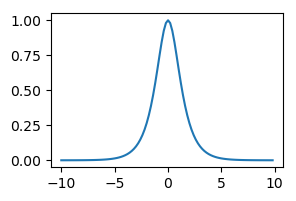

In [4]:
# Plotting

plt.figure(figsize=(3,2))

plt.plot(x, rho_0)

plt.show()

## FFT method:

In [5]:
# Wavemunbers - spatial frequencies:

k_numbers = 2*np.pi*np.fft.fftfreq(len(x), d=delta_x)

#print(k_numbers.shape)

#print(k_numbers)

In [6]:
# FFT of the initial condition

rho_0_hat = np.fft.fft(rho_0)

#print(rho_0_hat)

In [7]:
# Norm of Fourier transform

ampli_rho_0_hat = np.abs(rho_0_hat)/(rho_0_hat.size//2)

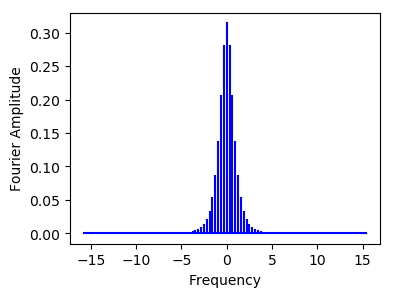

In [8]:
# Plotting

plt.figure(figsize = (4, 3))
plt.stem(k_numbers, ampli_rho_0_hat, 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency')
plt.ylabel('Fourier Amplitude')

plt.show()

### Concatenate real and complex arrays

ODE integrators don't like complex numbers.

In [9]:
rho_0_conc = np.concatenate((rho_0_hat.real, rho_0_hat.imag))
print(rho_0_hat.shape, rho_0_conc.shape)

(100,) (200,)


In [10]:
#print(rho_0_conc)

### Time discretisation:

In [11]:
# Time step
t_step = 0.025

m = 100

t = np.arange(0, m*t_step, t_step)

print(t.shape)

(100,)


### Construct ODE (RHS of ODE)

In [12]:
# Function to get RHS

def RHS_ODE(rho_0_conc, t, k_numbers, c):
    
    u_tilde = rho_0_conc[:N] + (1j)*rho_0_conc[N:]
    
    rhs_u_tilde = -(1j)*(c)*(k_numbers)*u_tilde
    
    rhs_ode = np.concatenate((rhs_u_tilde.real, rhs_u_tilde.imag))
    
    return rhs_ode

### k ODEs: solution

In [13]:
import scipy.integrate as sint

In [14]:
# Call ODE integrator

solution = sint.odeint(RHS_ODE, rho_0_conc,\
                       t, args = (k_numbers, c))

print(solution.shape)

(100, 200)


### Reconstruct Complex solution:

In [15]:
rho_solution = solution[:, :N] + (1j)*solution[:, N:]

print(rho_solution.shape)

(100, 100)


### Inverse Fourier transform of each rho_solution

In [16]:
# For loop with k as index

inv_rho_solution = np.zeros(rho_solution.shape,\
                            dtype = complex)

for k in range(len(t)):
    
    inv_rho_solution[k, :] = np.fft.ifft(rho_solution[k, :])
    
print(inv_rho_solution.shape)

(100, 100)


### Plotting the solution:

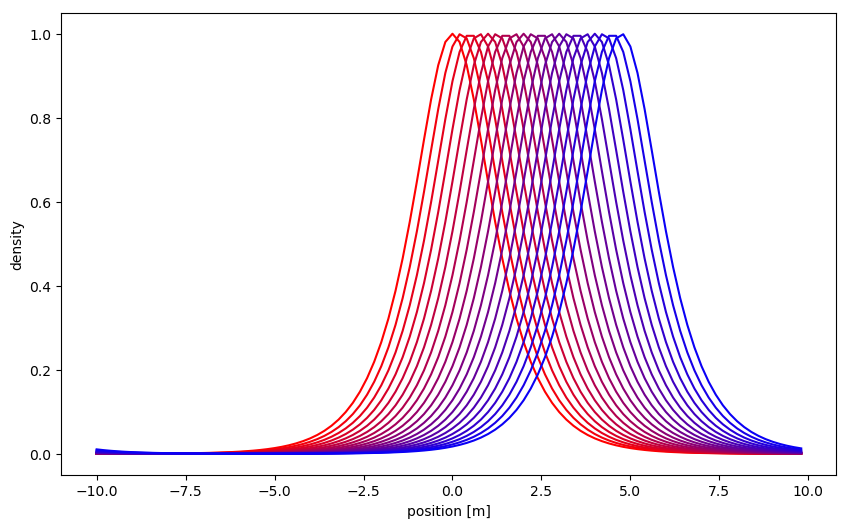

In [22]:
# Add colour

R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize= (10, 6))

for j in range(0, m, 5):
    plt.plot(x, inv_rho_solution[j, :], color = [R[j], G, B[j]])

plt.xlabel("position [m]")
plt.ylabel("density")

plt.show()

### Surface plot:

In [18]:
from mpl_toolkits.mplot3d import axes3d

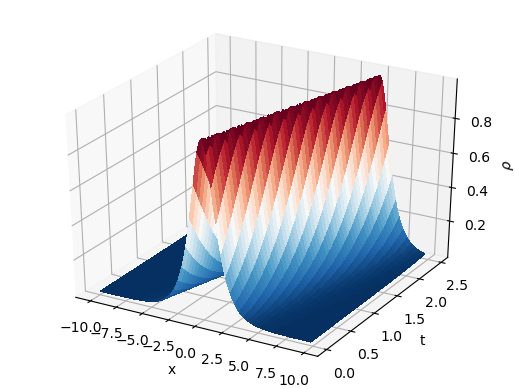

In [20]:
# Grid
x_grid, t_grid = np.meshgrid(x, t)

# Plot

fig = plt.figure()

ax = plt.axes(projection='3d')
#ax.contour3D(x_grid, t_grid, u, 1000, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface

ax.plot_surface(x_grid, t_grid, inv_rho_solution.real, cmap='RdBu_r', linewidth=0, antialiased=False)

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('t')
ax.set_zlabel(r'$\rho$')

plt.show()

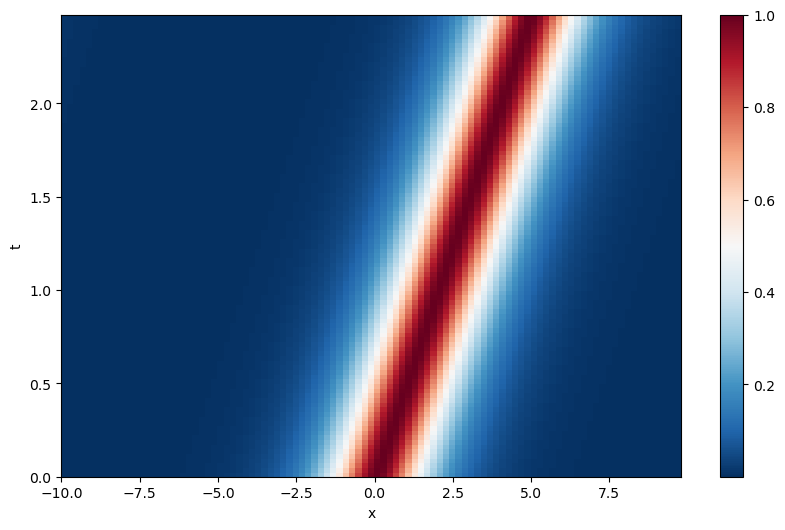

In [21]:
plt.figure(figsize= (10, 6))

#ax = plt.axes(projection='3d')
#ax.contour3D(x_grid, t_grid, u, 1000, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface

Z = plt.pcolor(x_grid, t_grid, inv_rho_solution.real, cmap='RdBu_r')

plt.colorbar(Z)

plt.xlabel('x')
plt.ylabel('t')
#plt.zlabel('T')

plt.show()

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


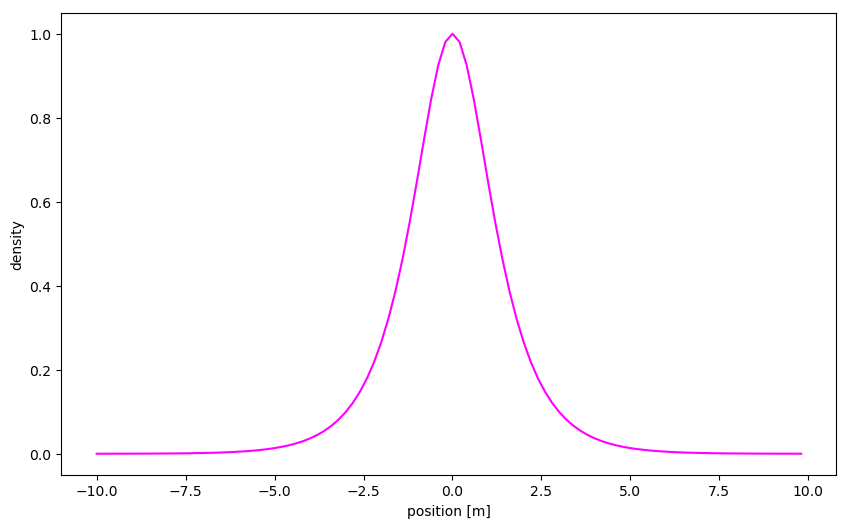

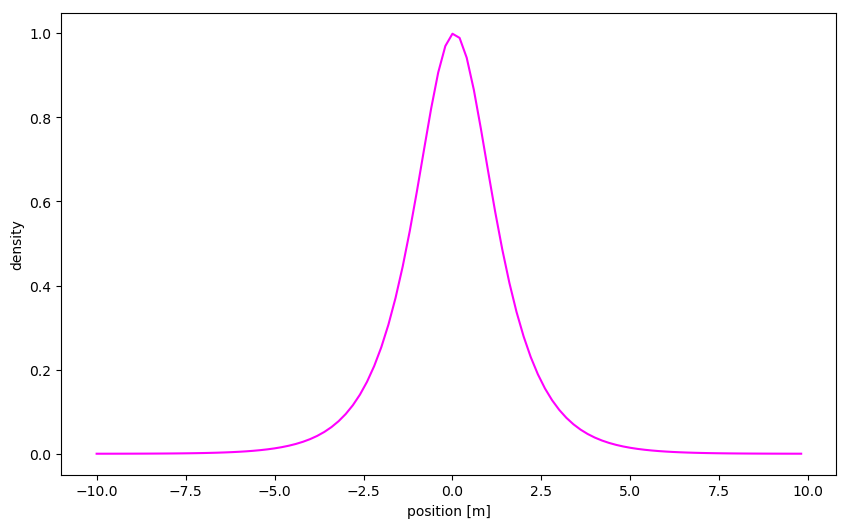

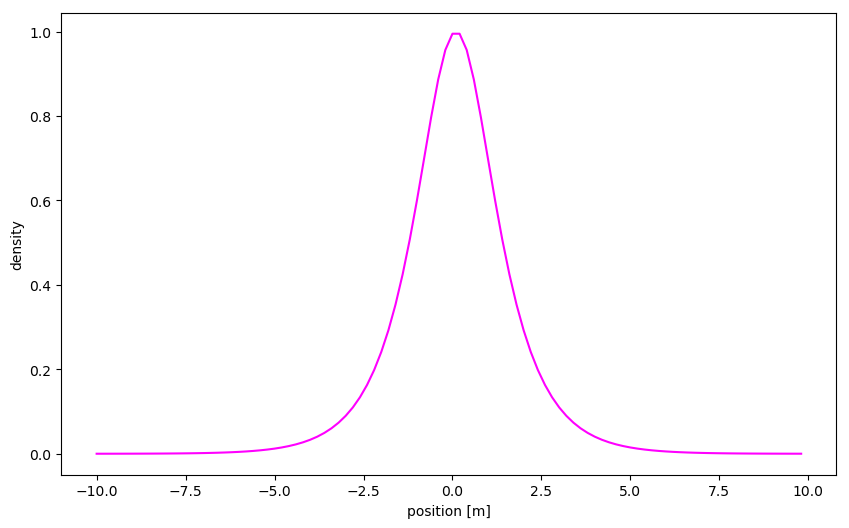

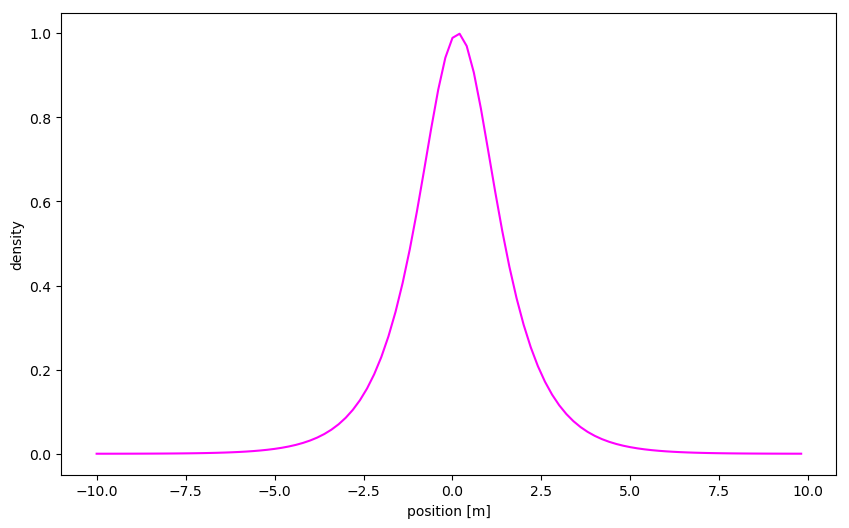

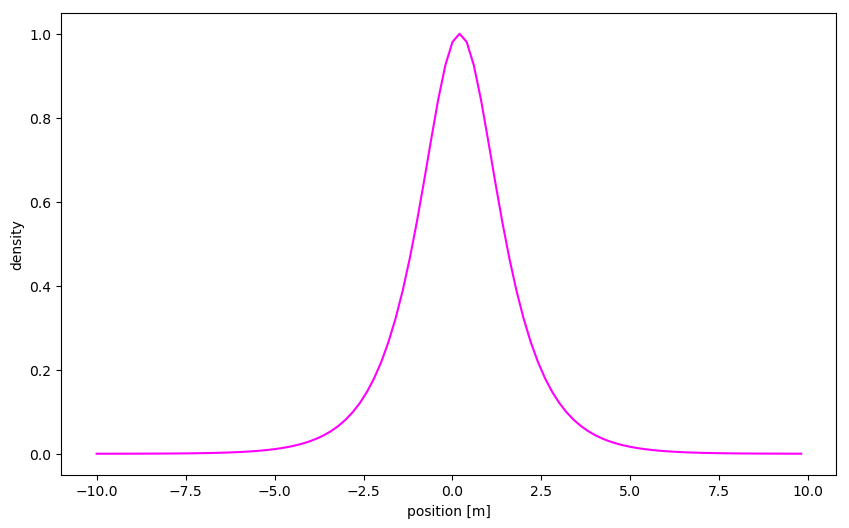

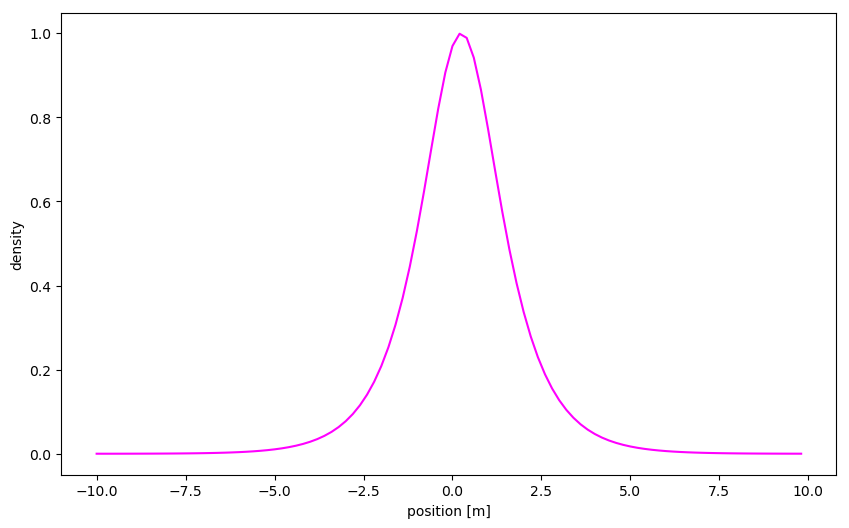

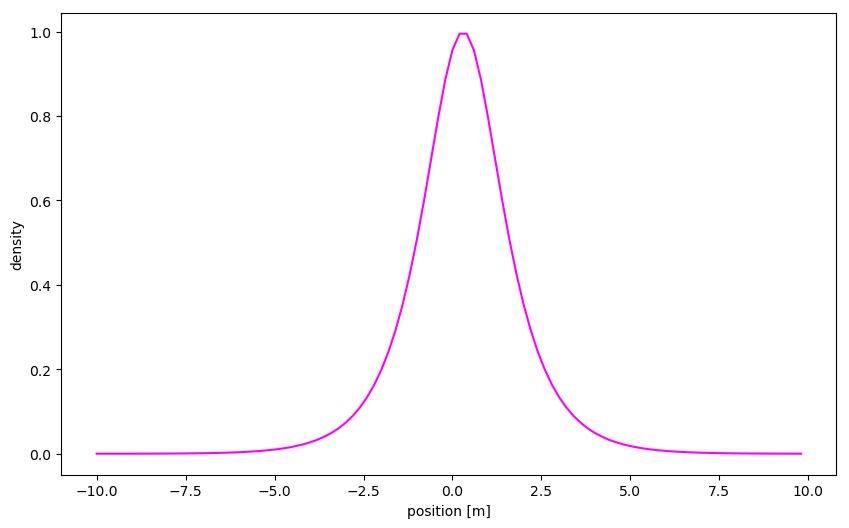

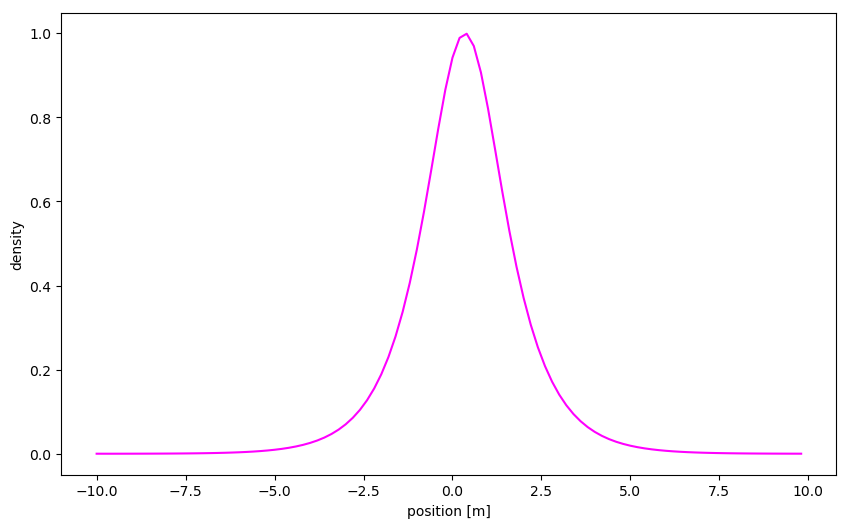

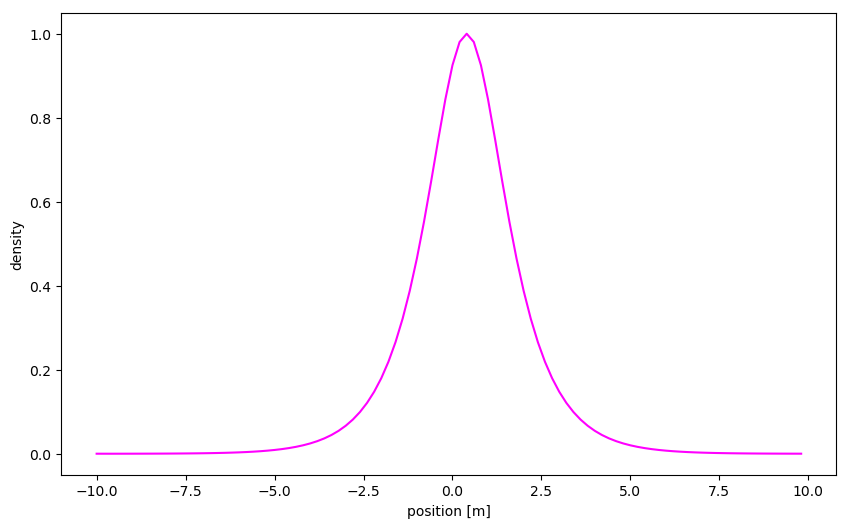

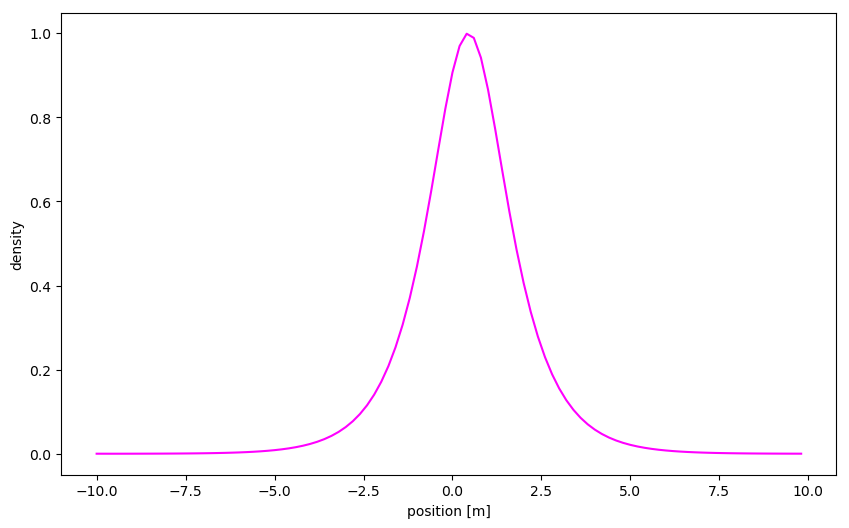

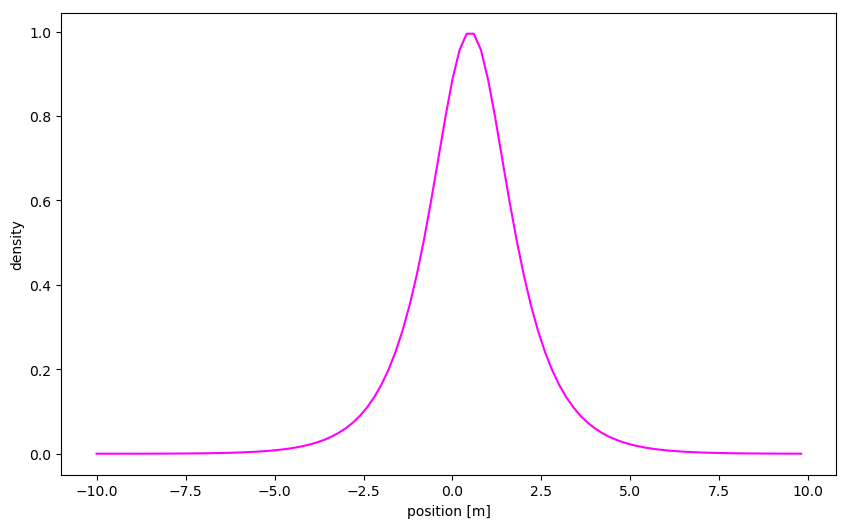

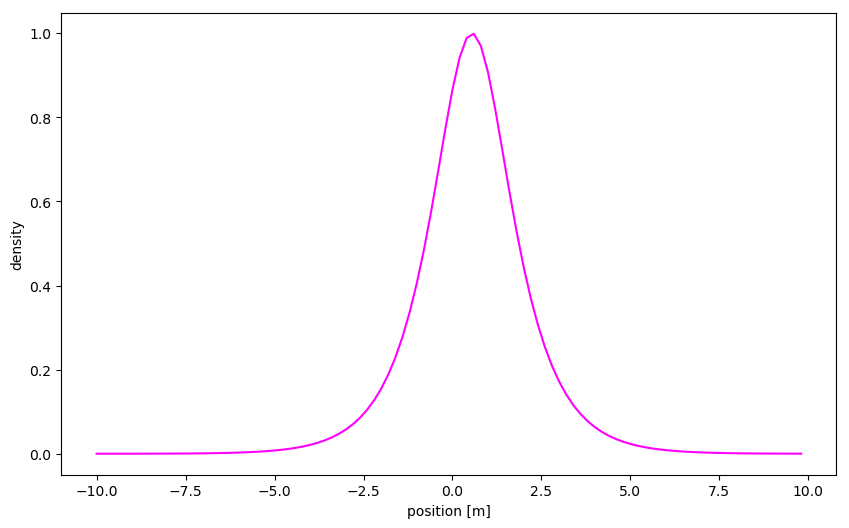

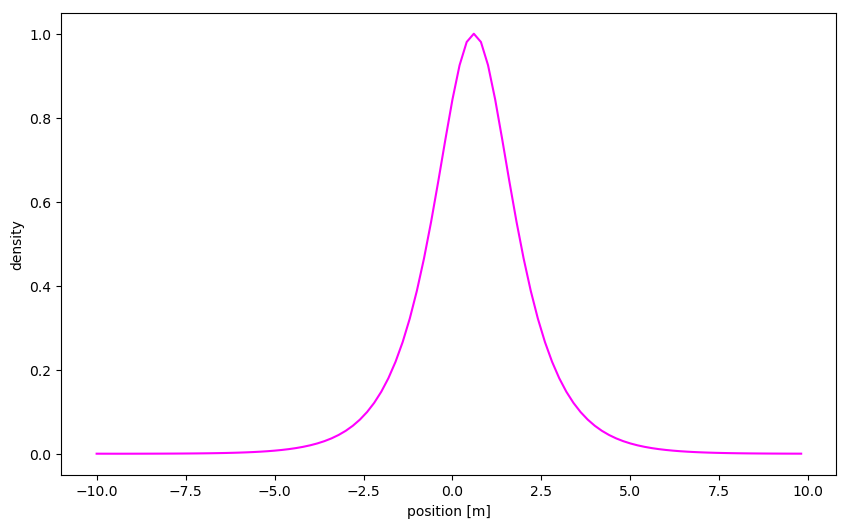

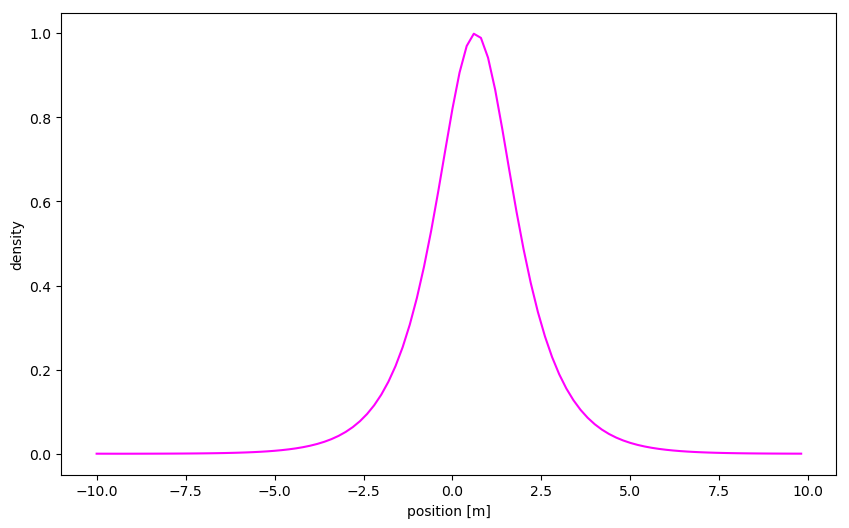

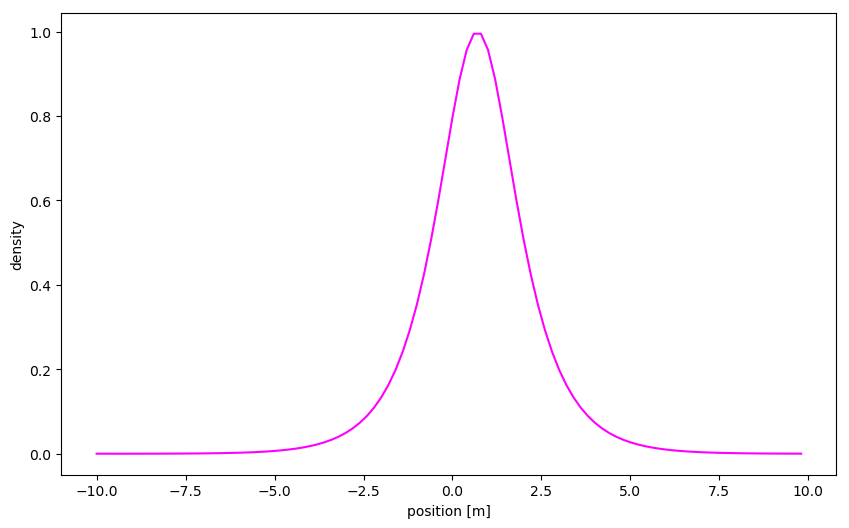

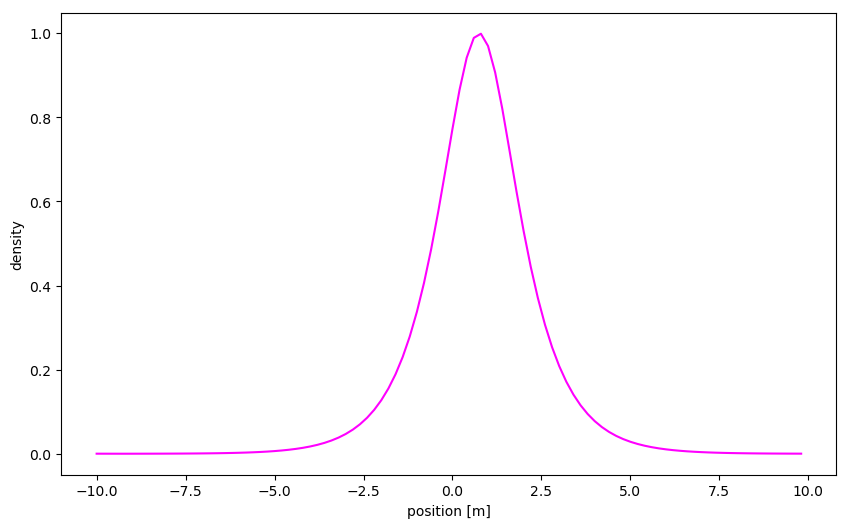

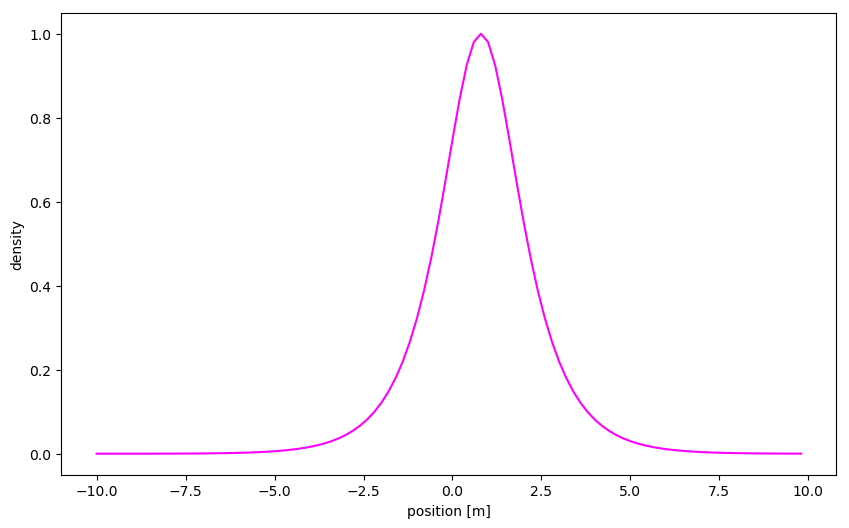

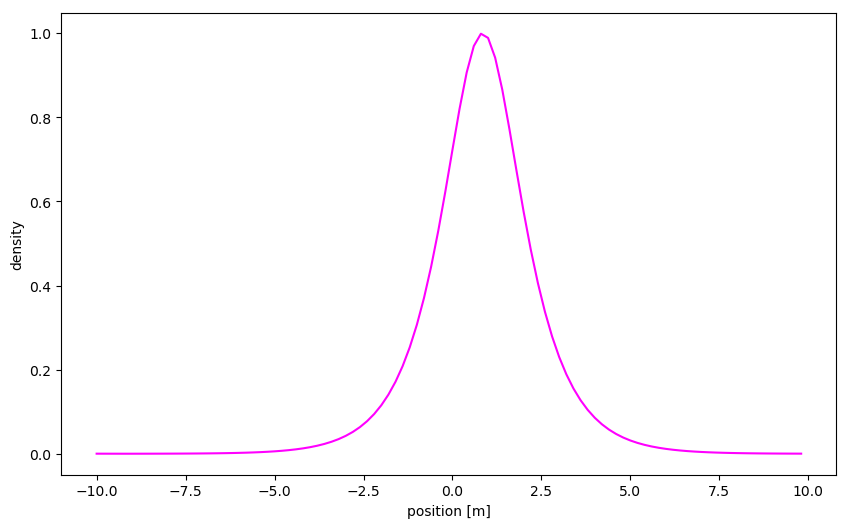

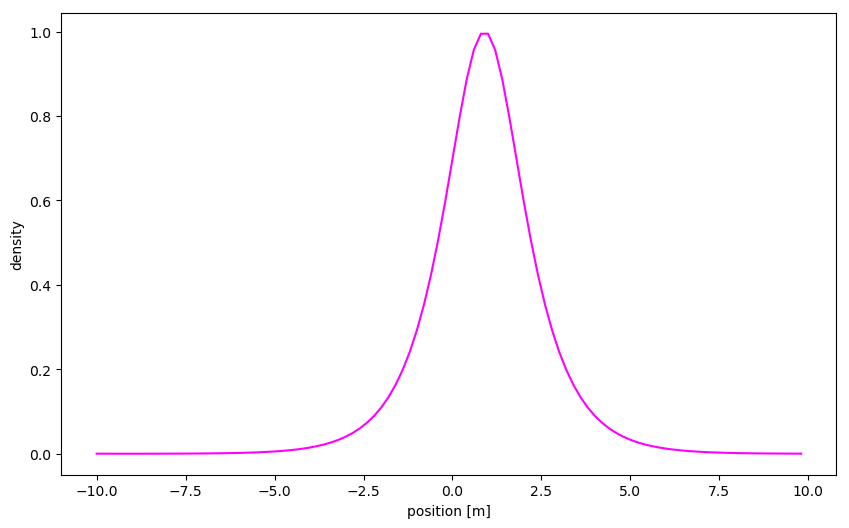

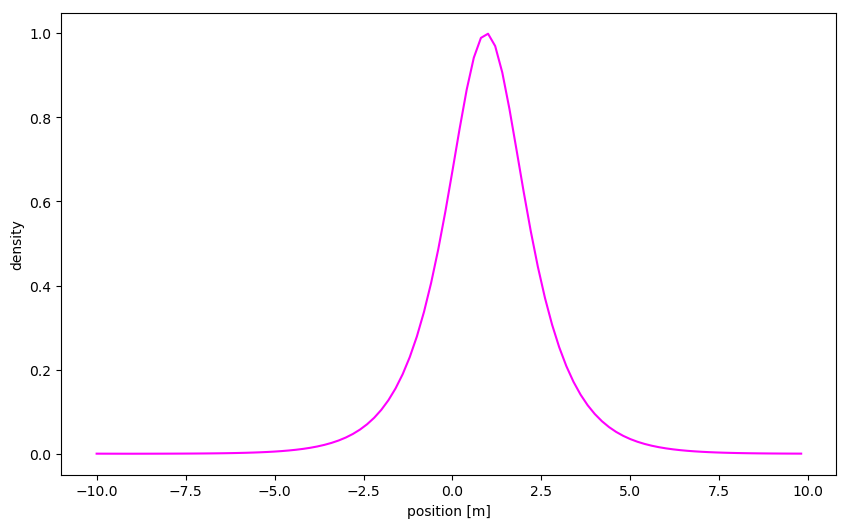

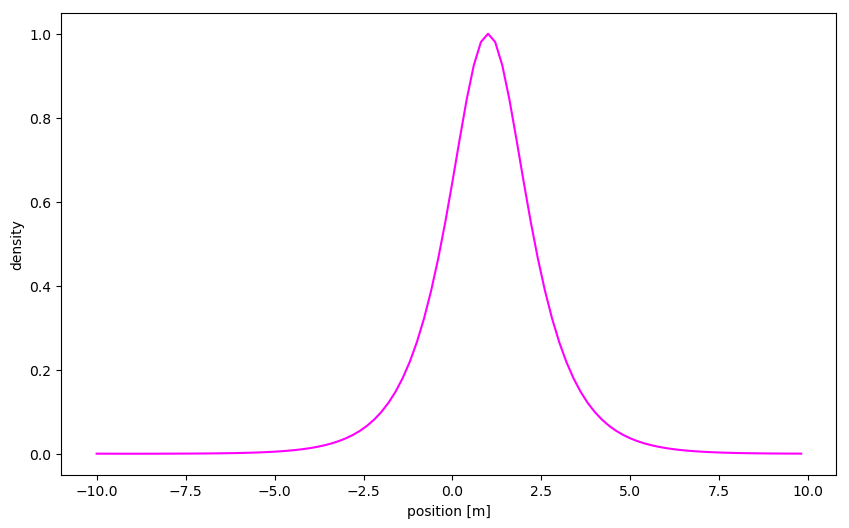

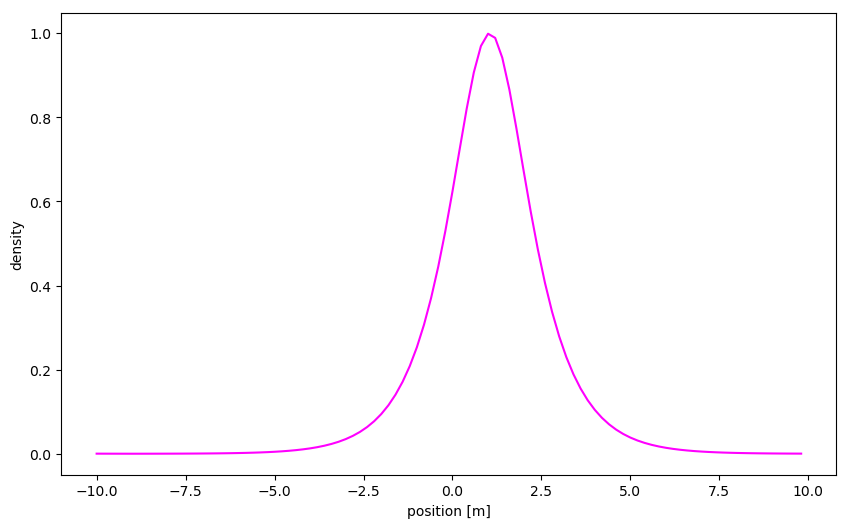

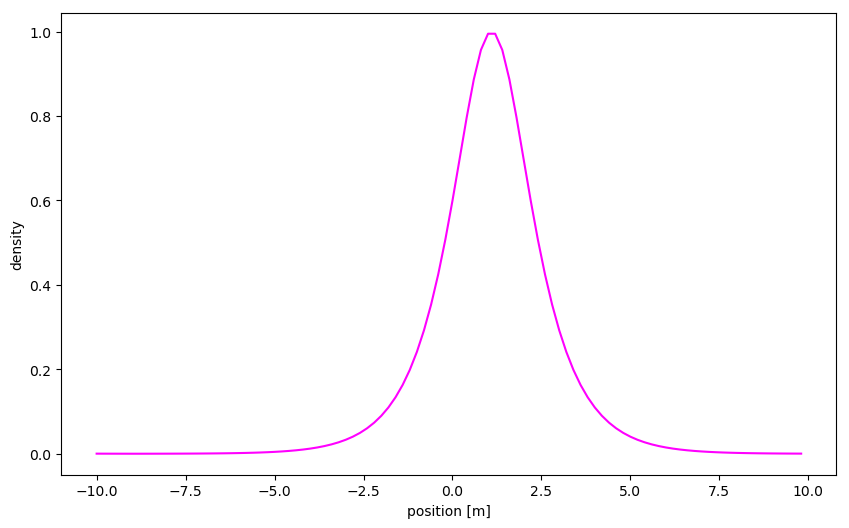

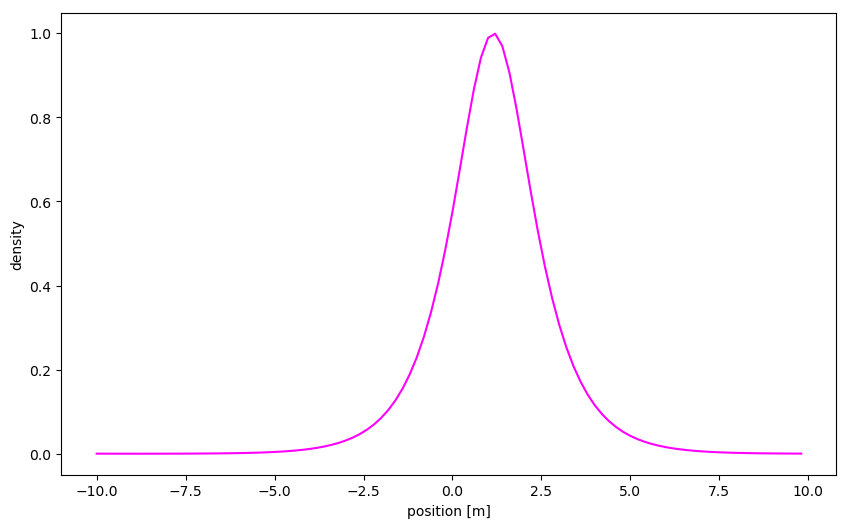

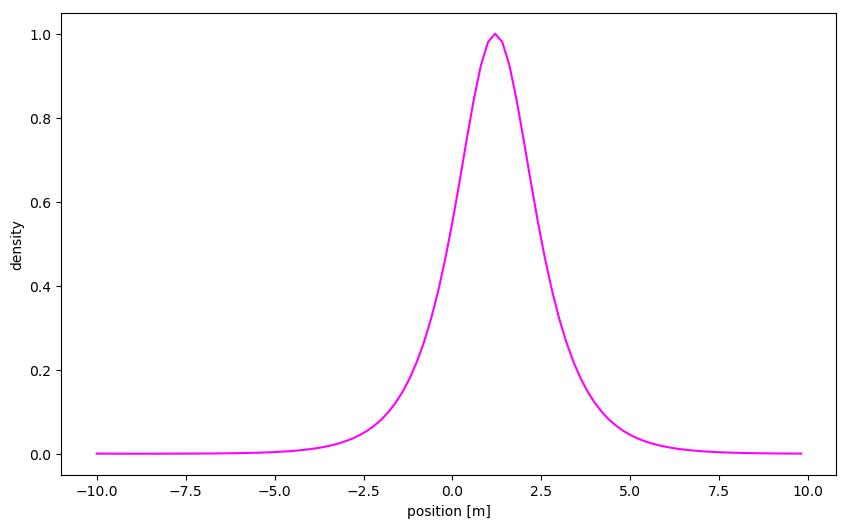

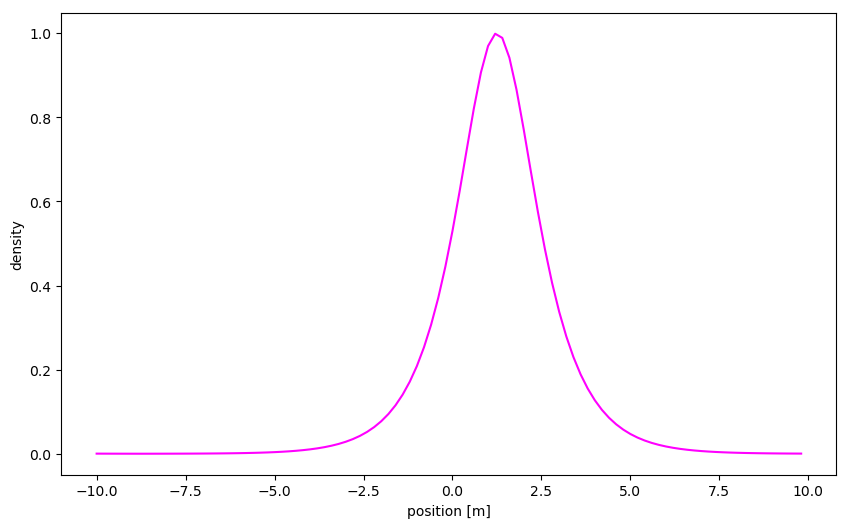

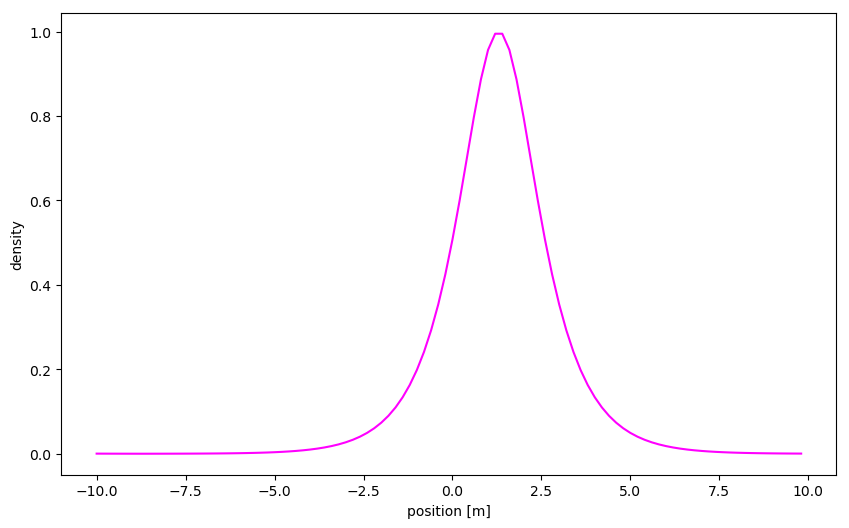

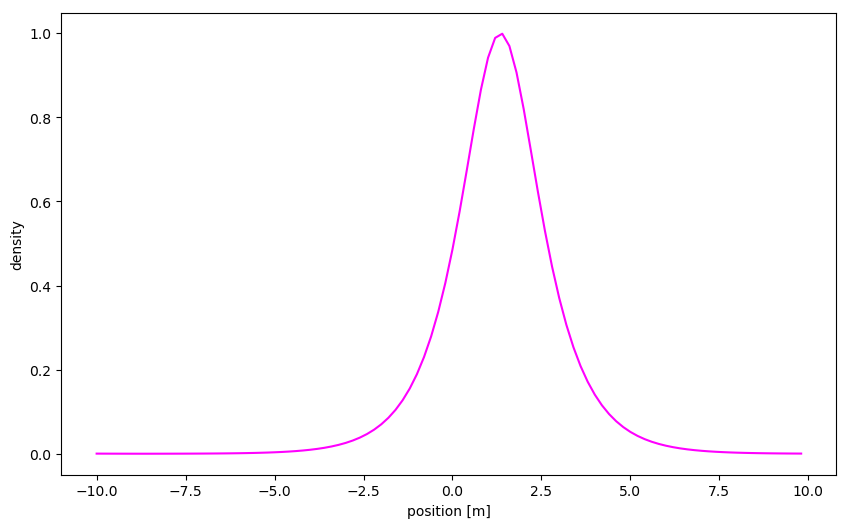

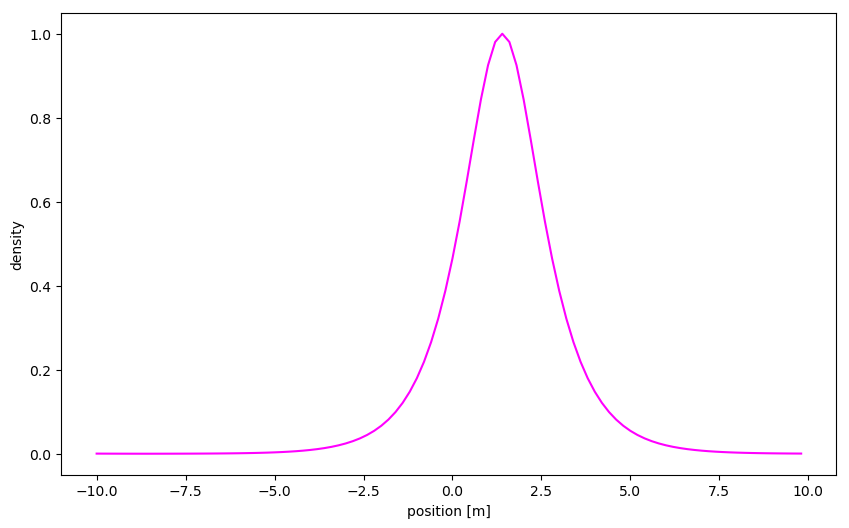

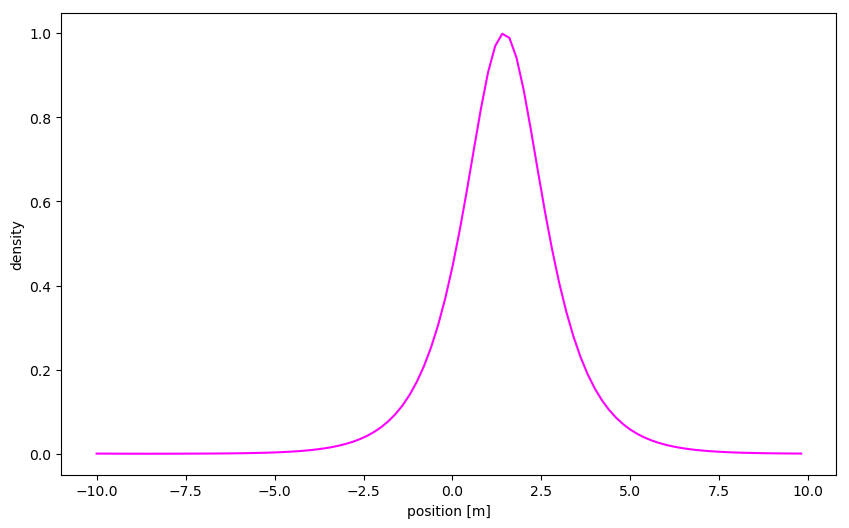

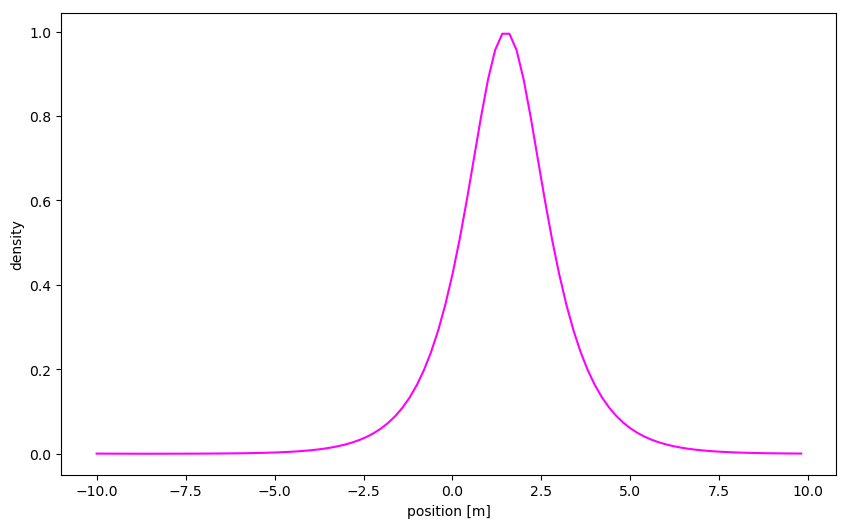

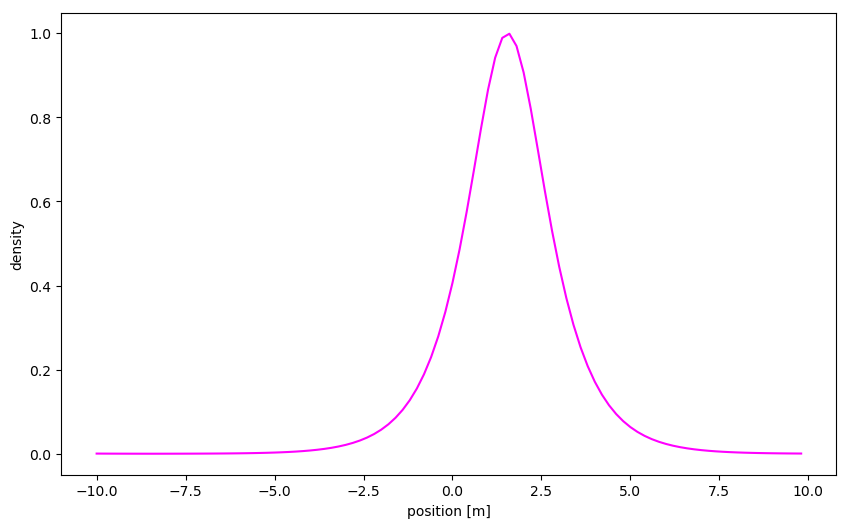

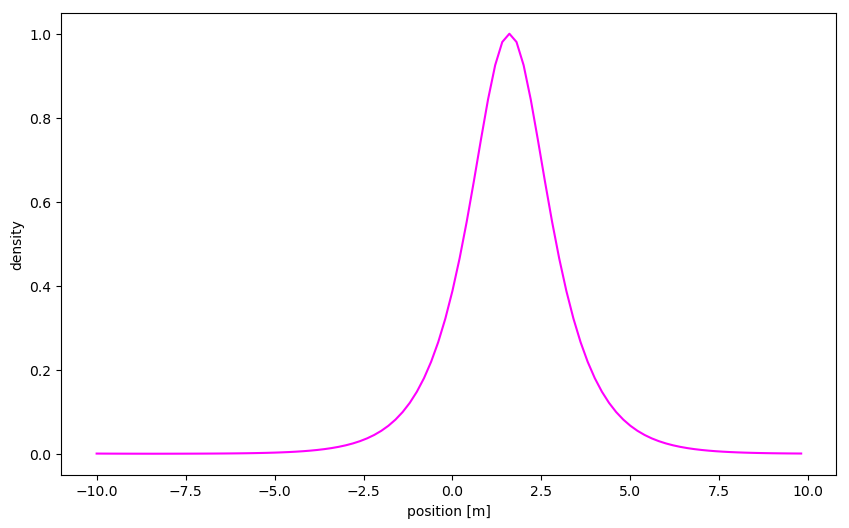

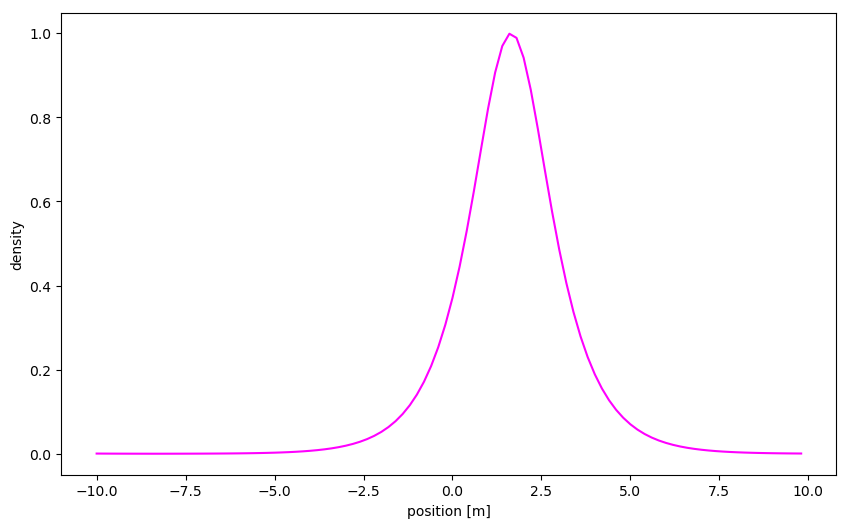

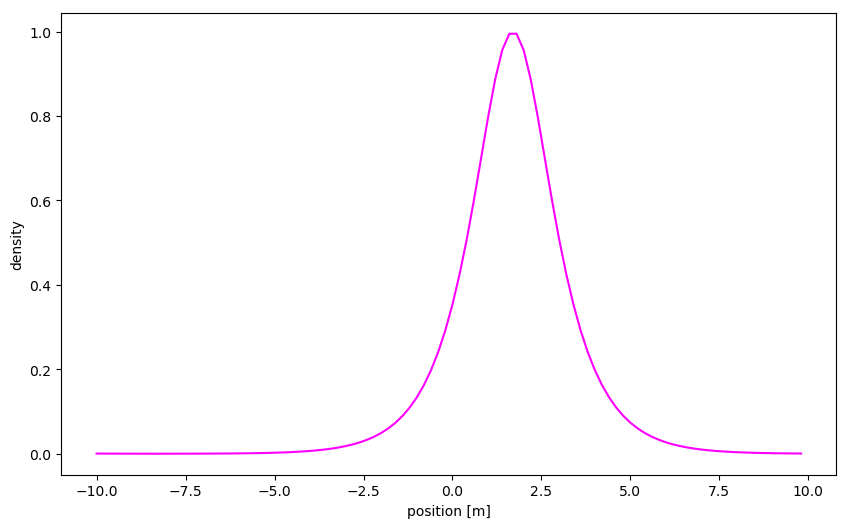

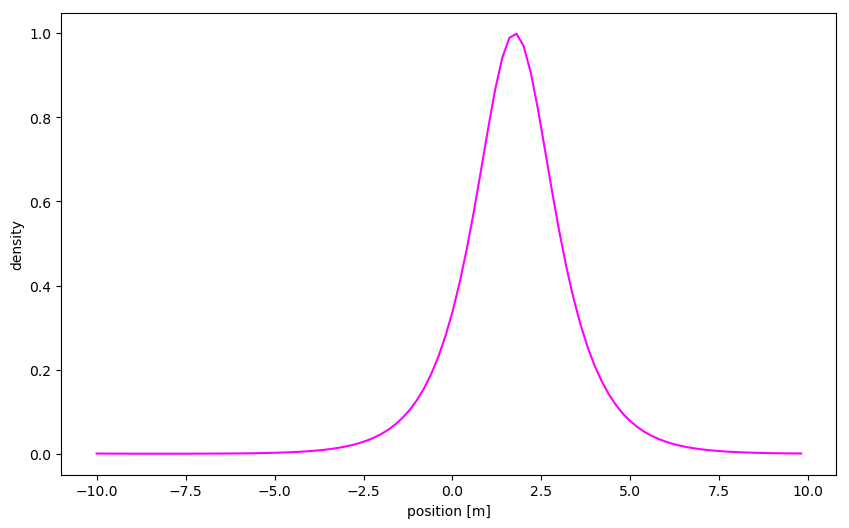

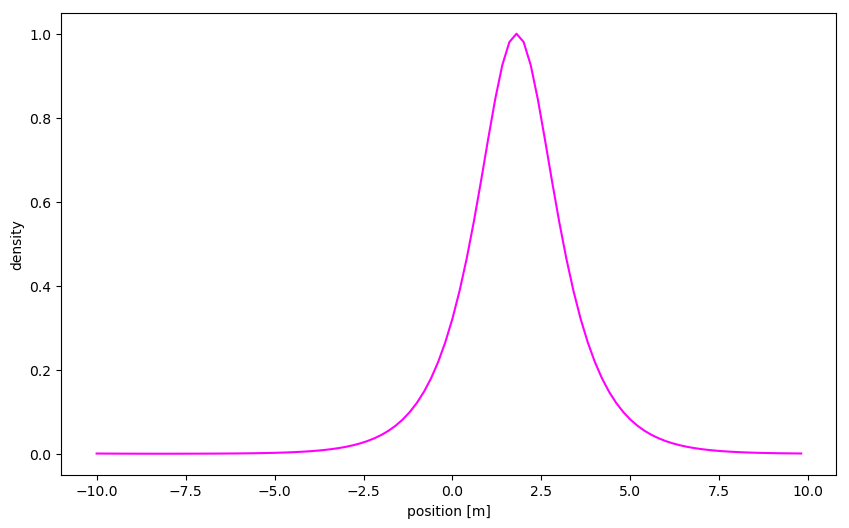

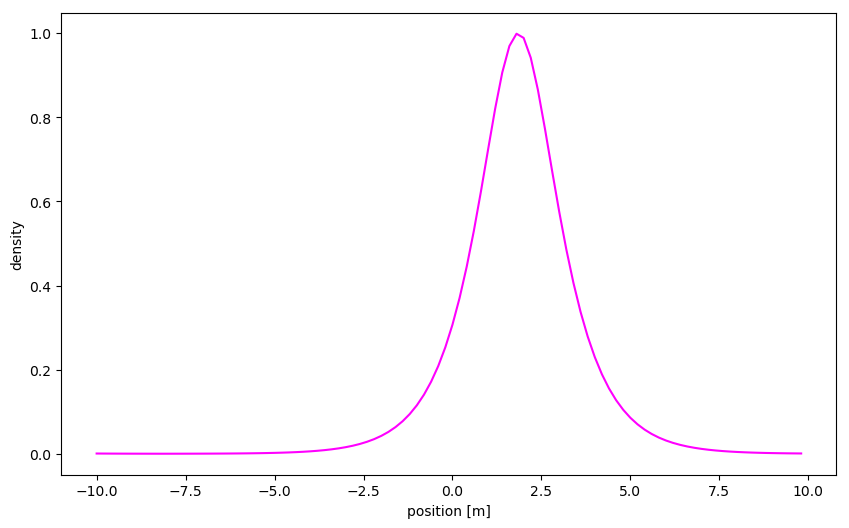

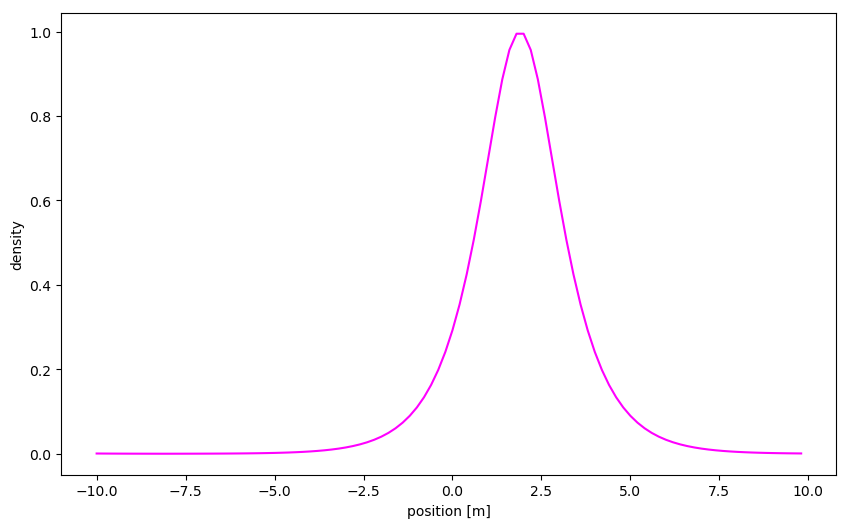

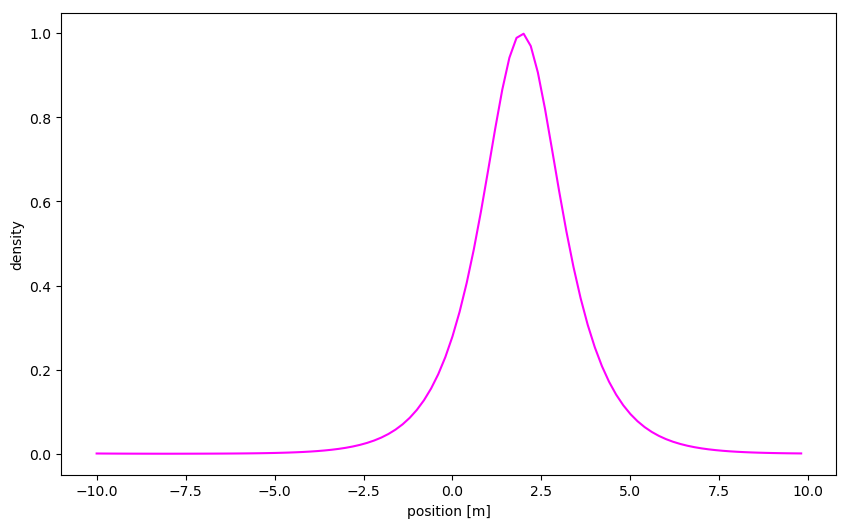

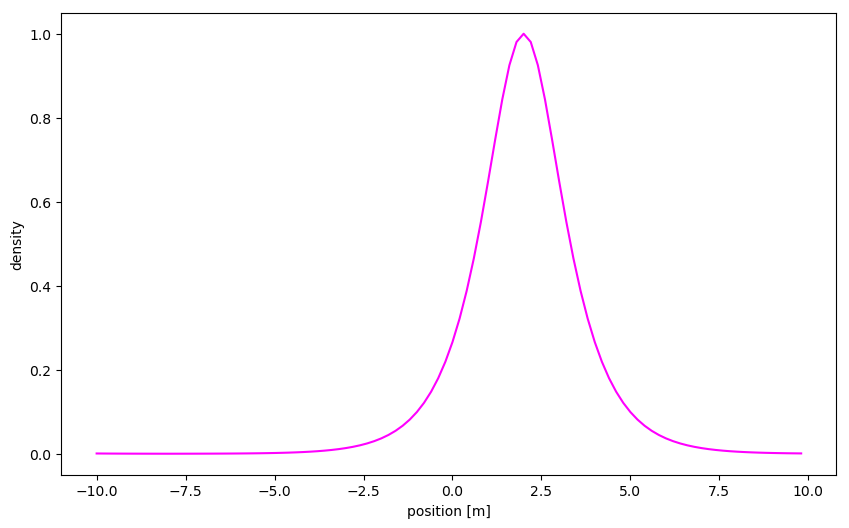

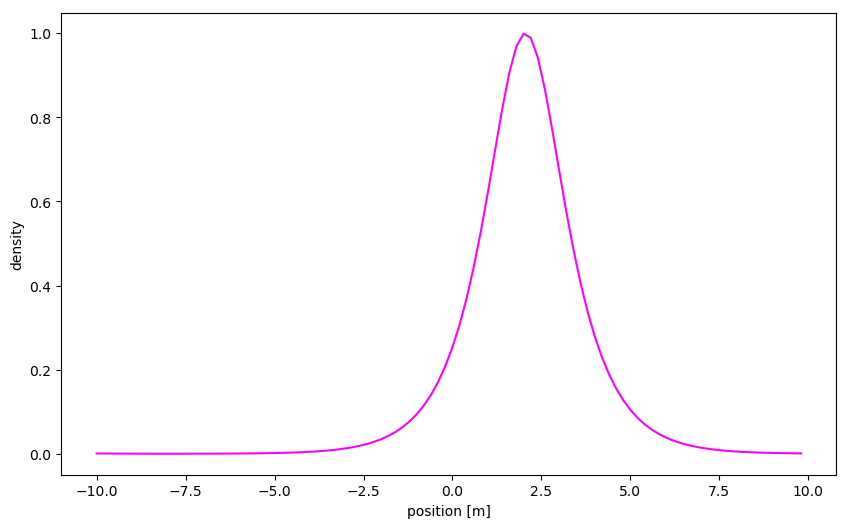

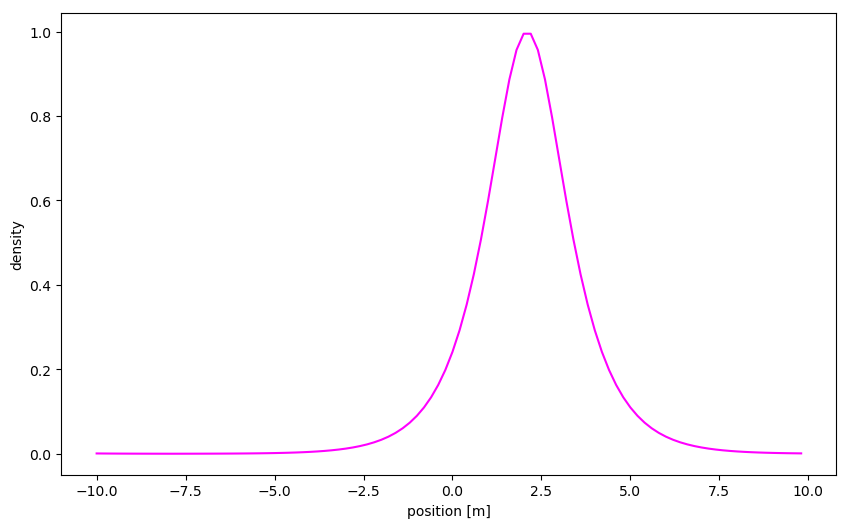

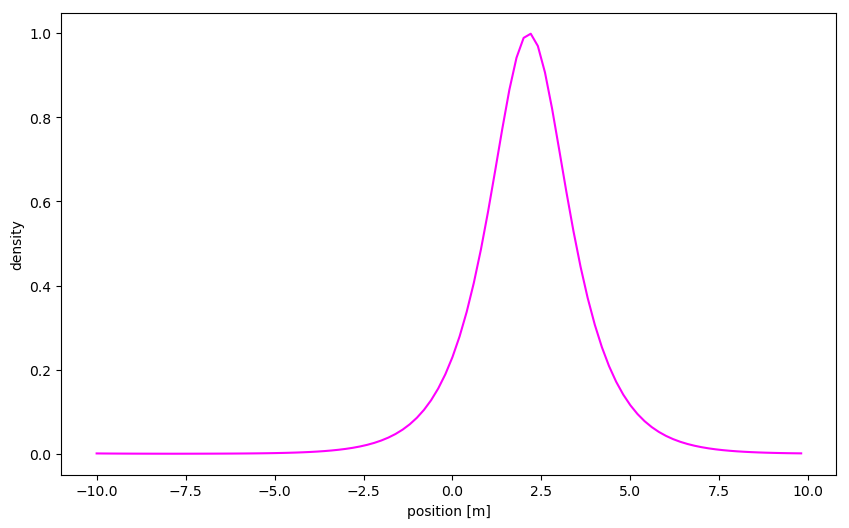

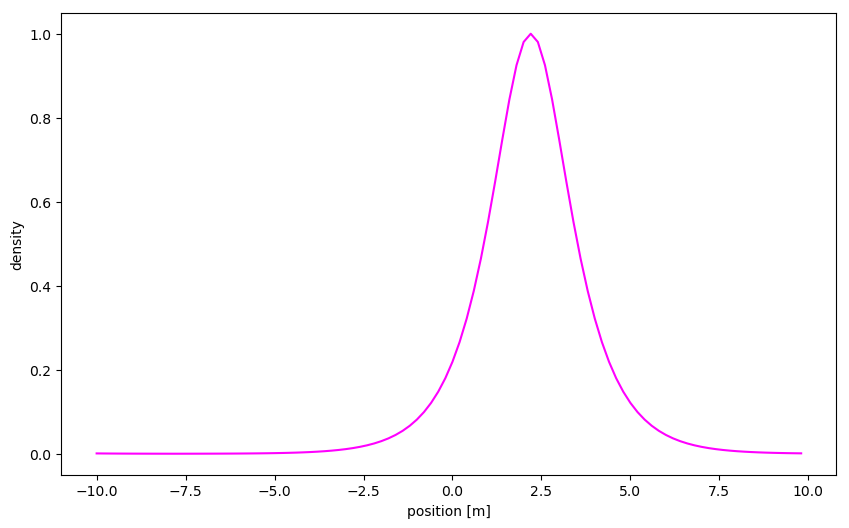

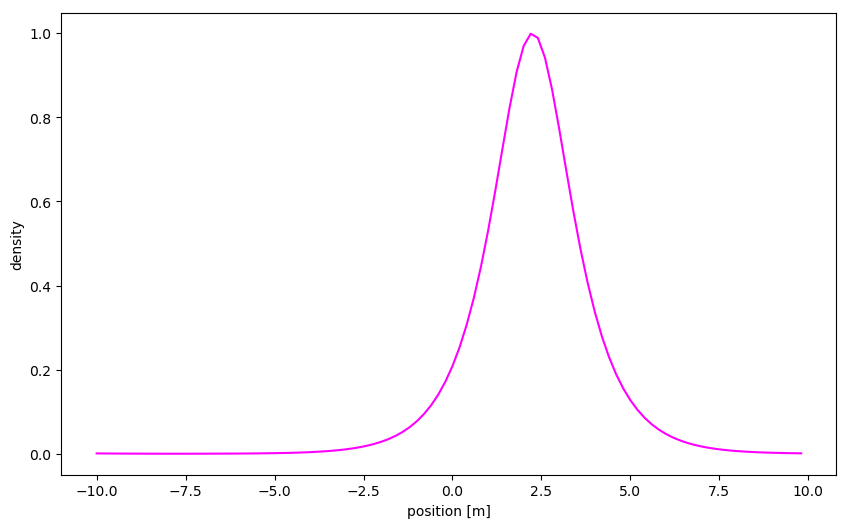

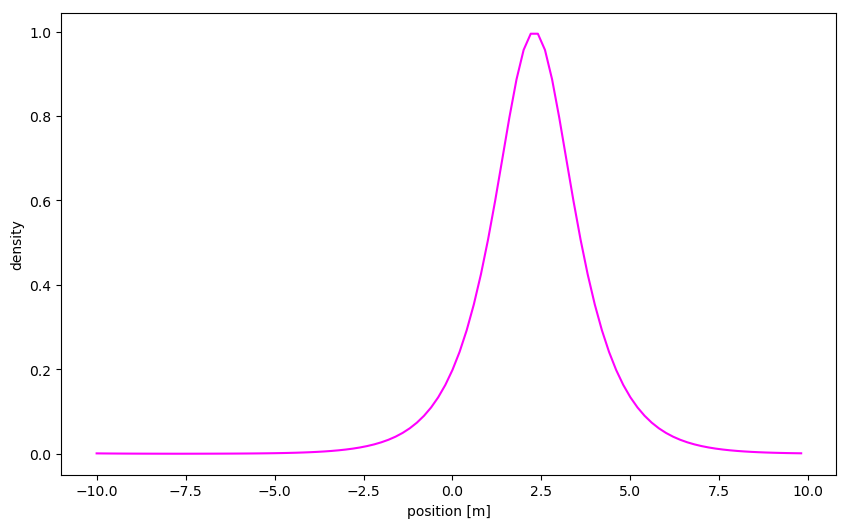

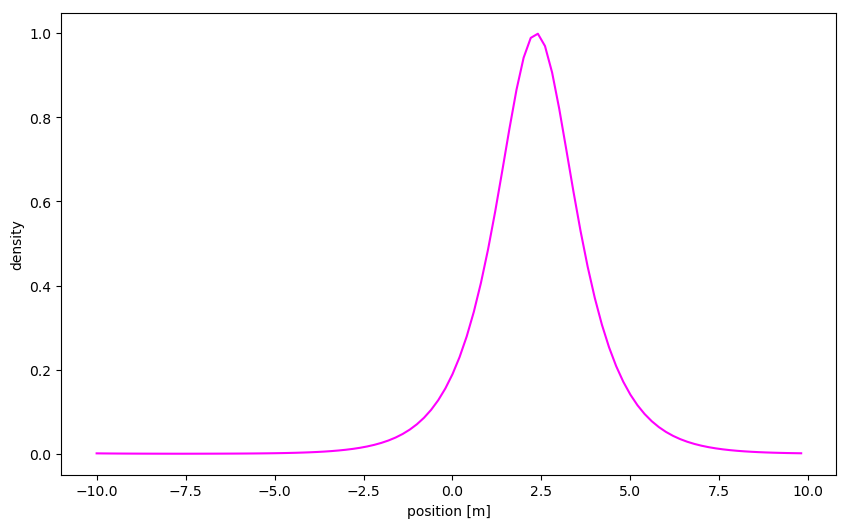

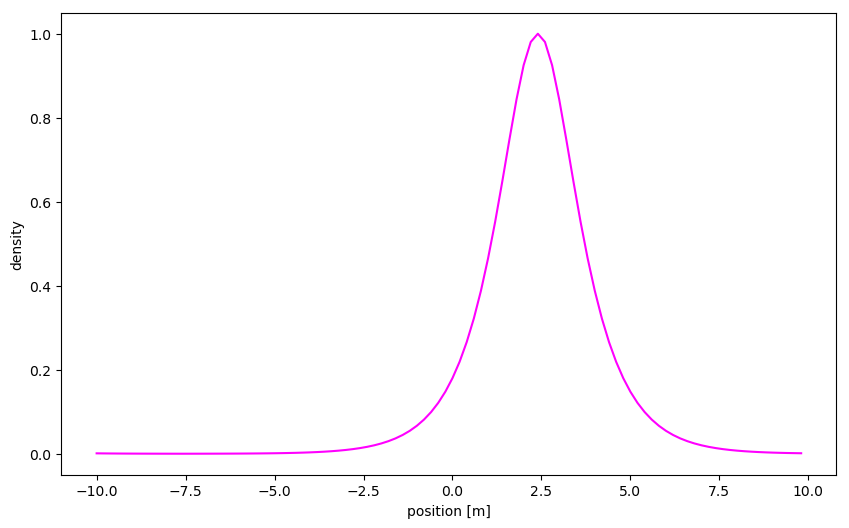

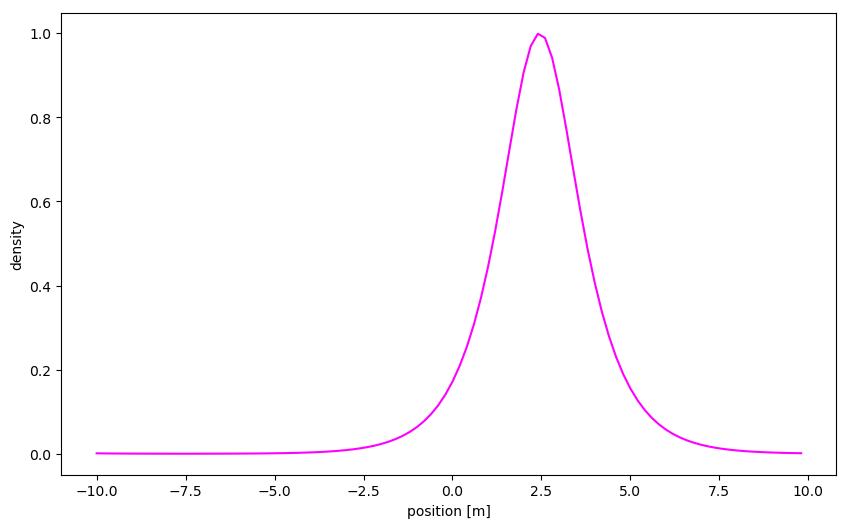

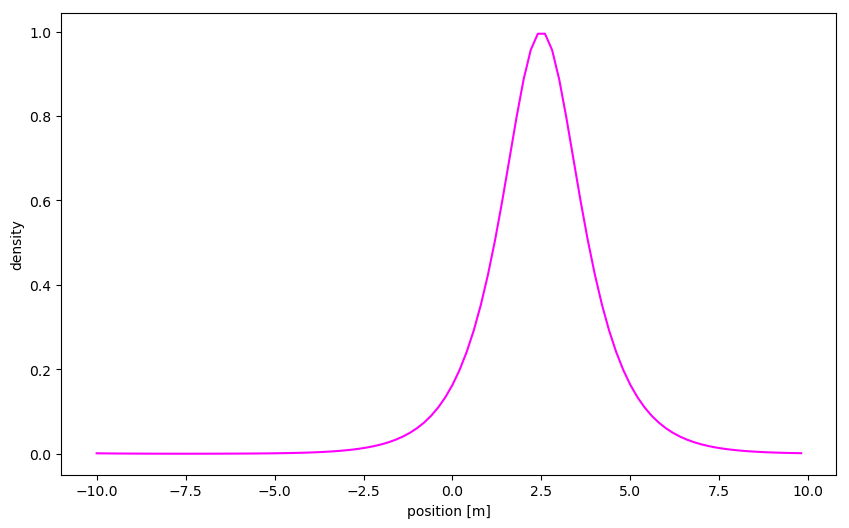

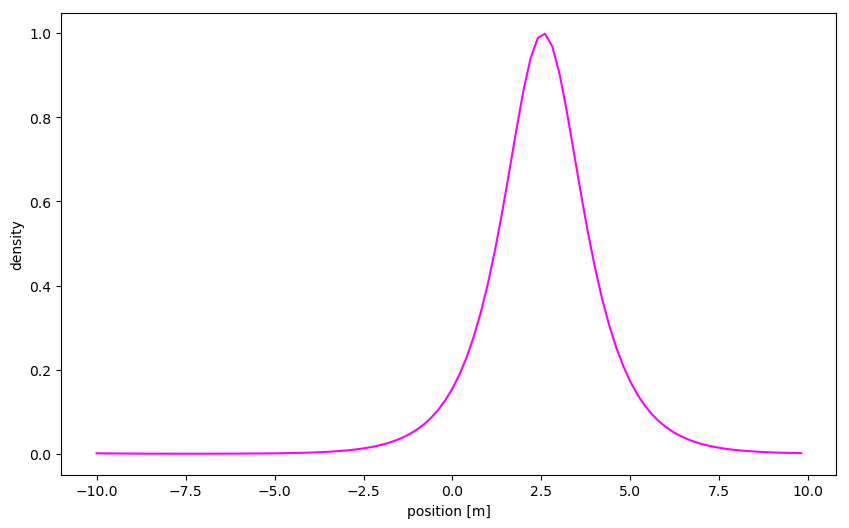

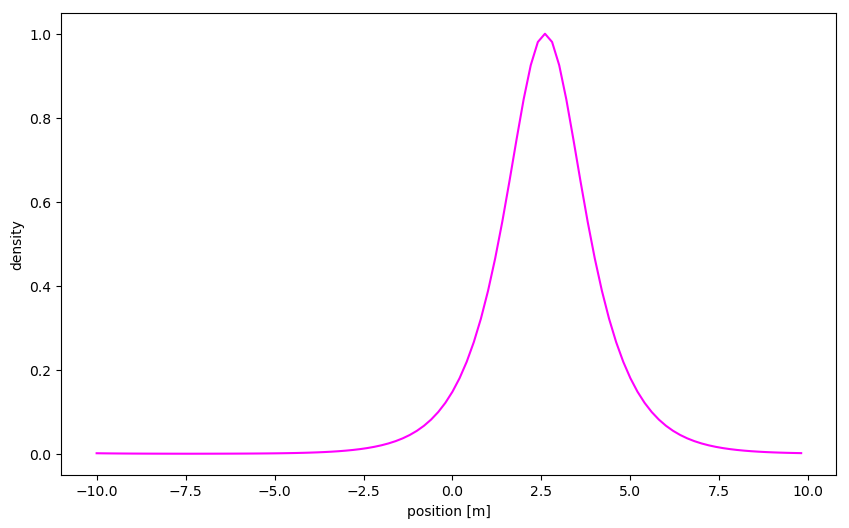

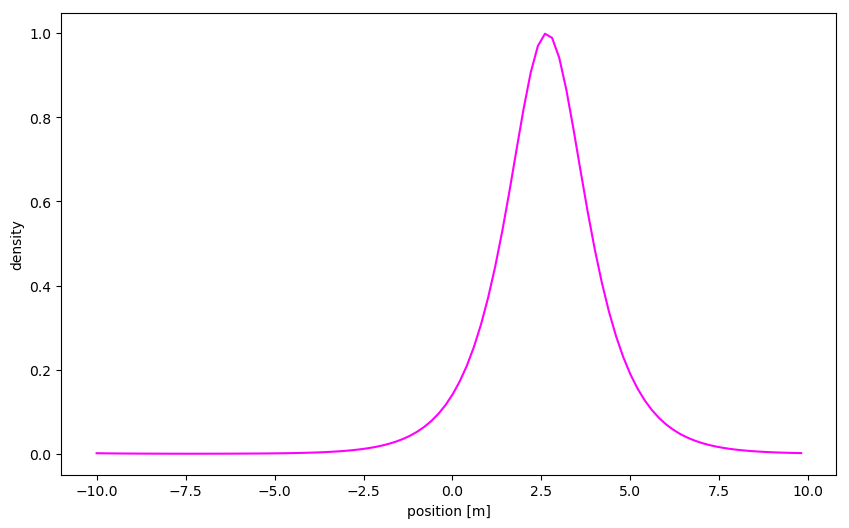

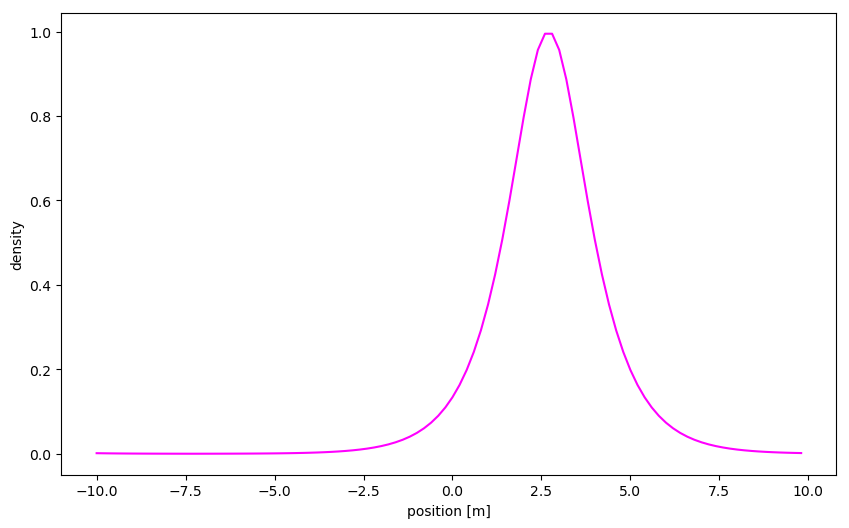

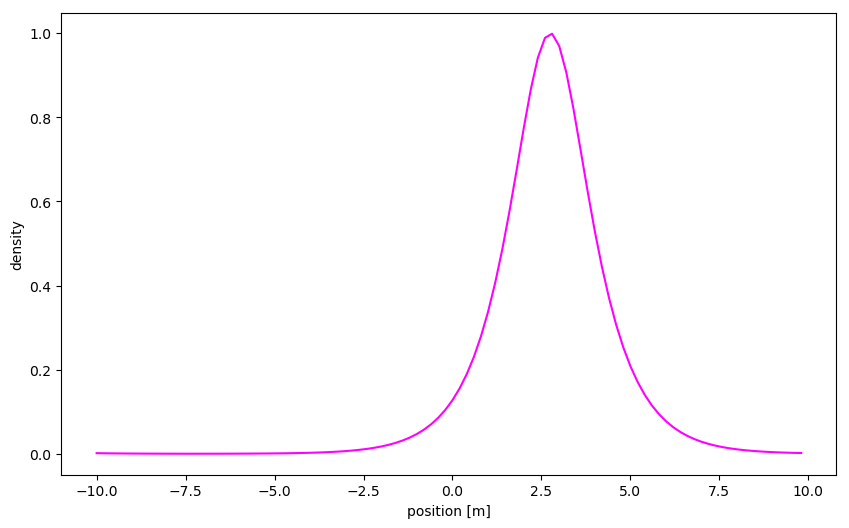

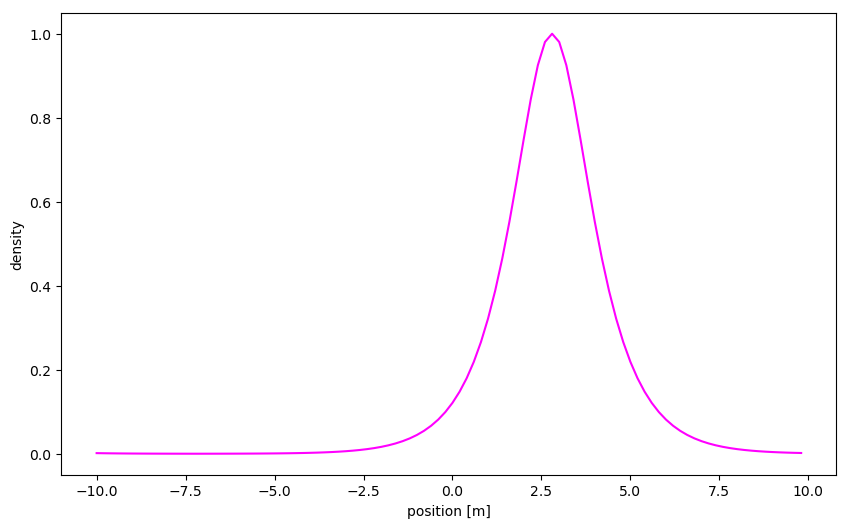

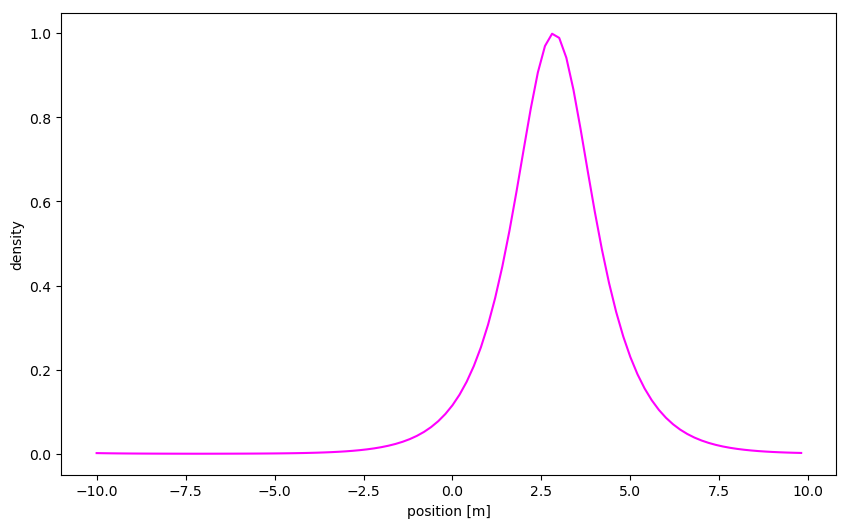

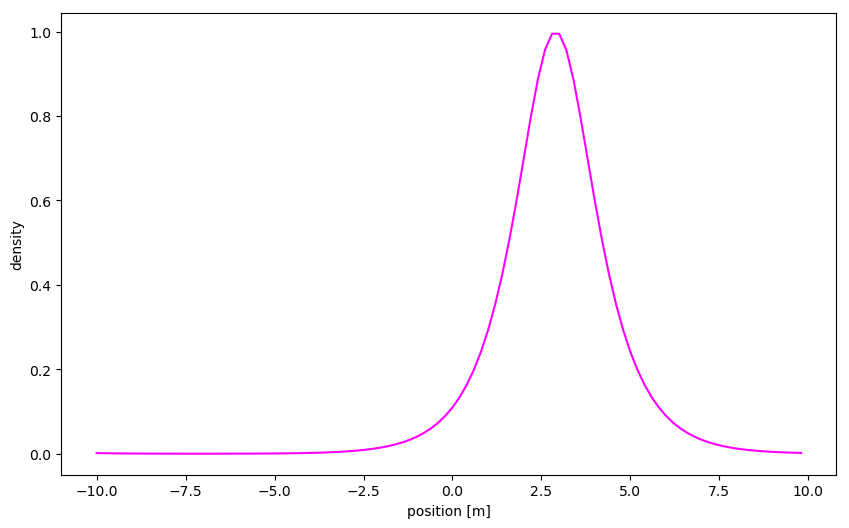

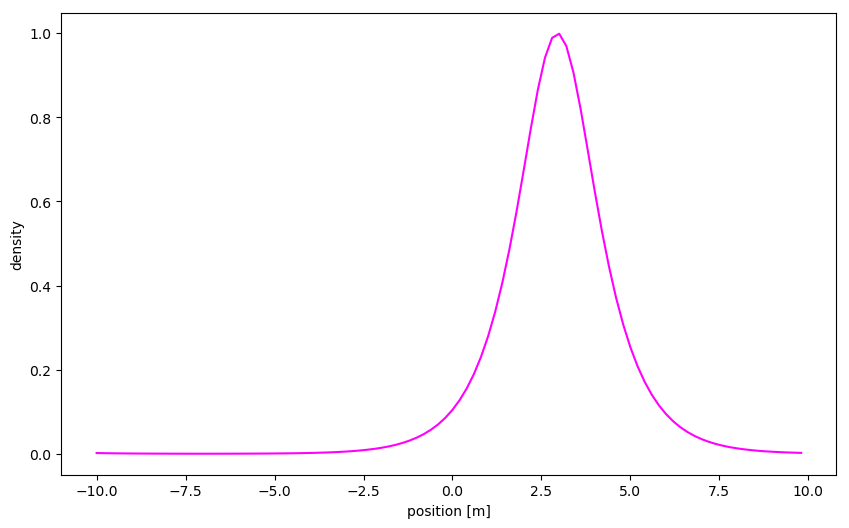

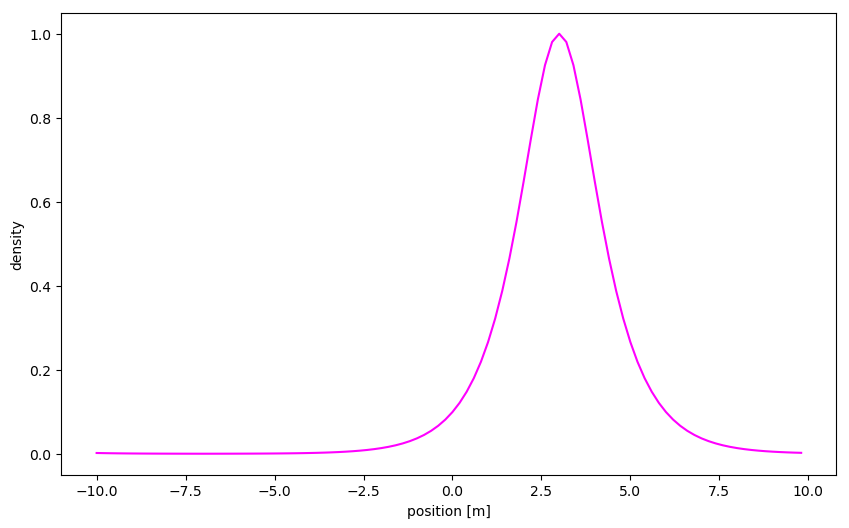

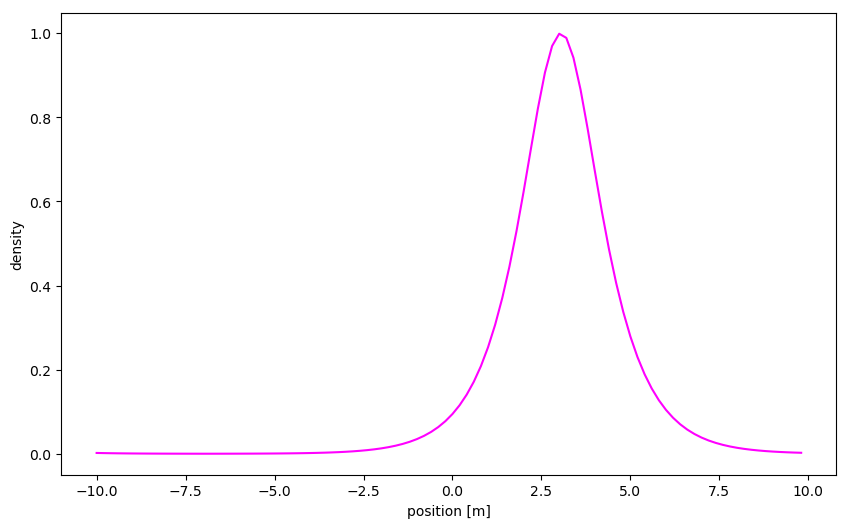

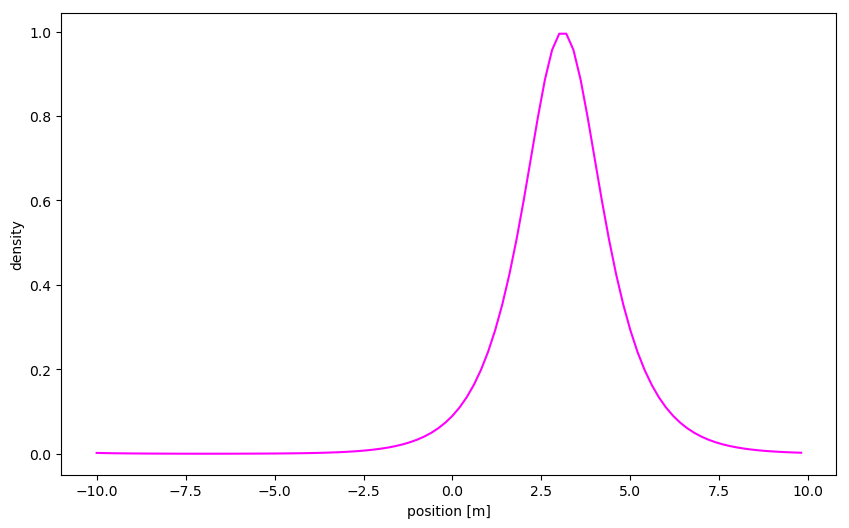

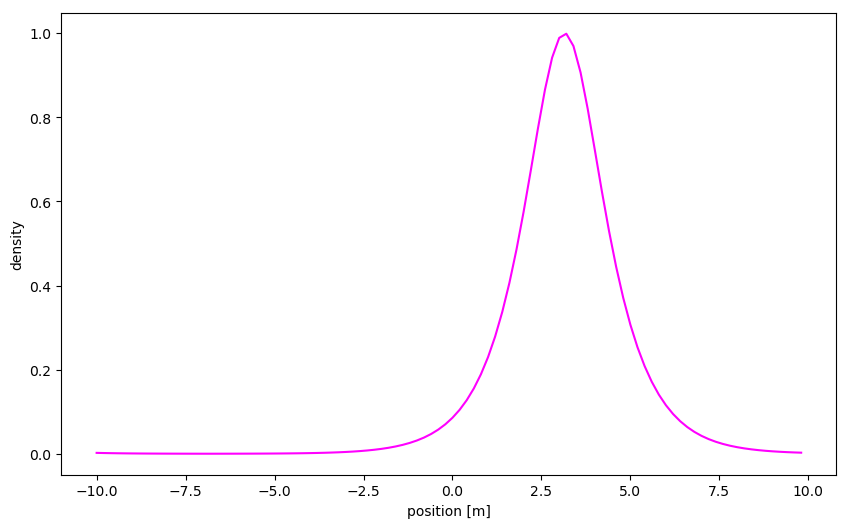

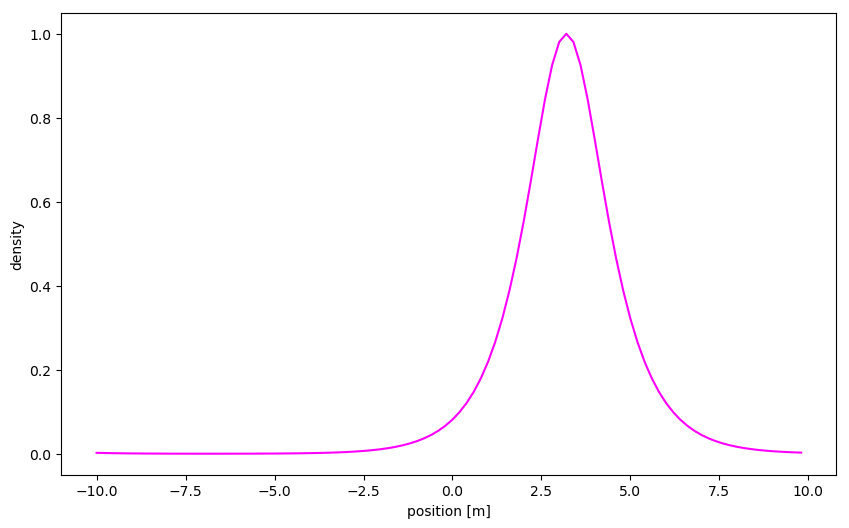

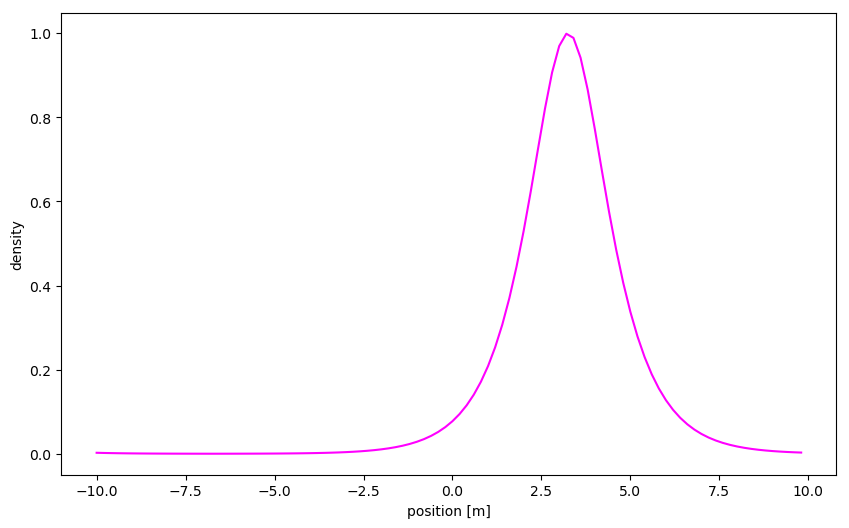

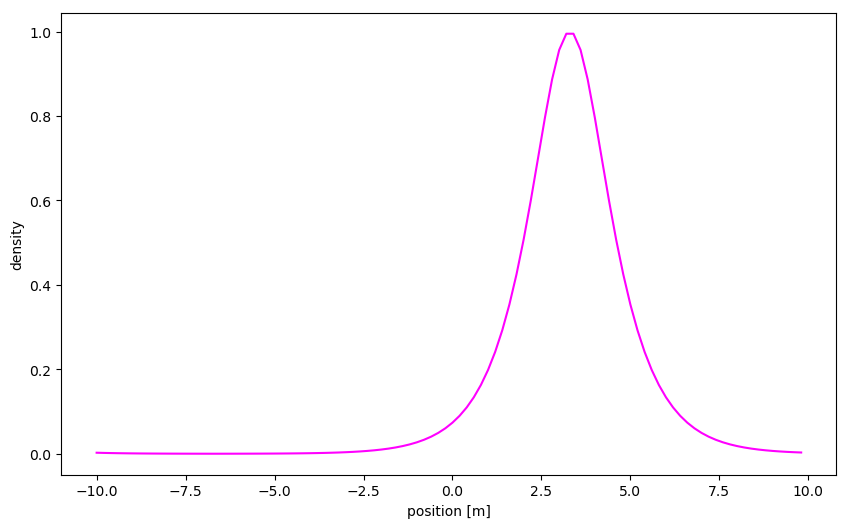

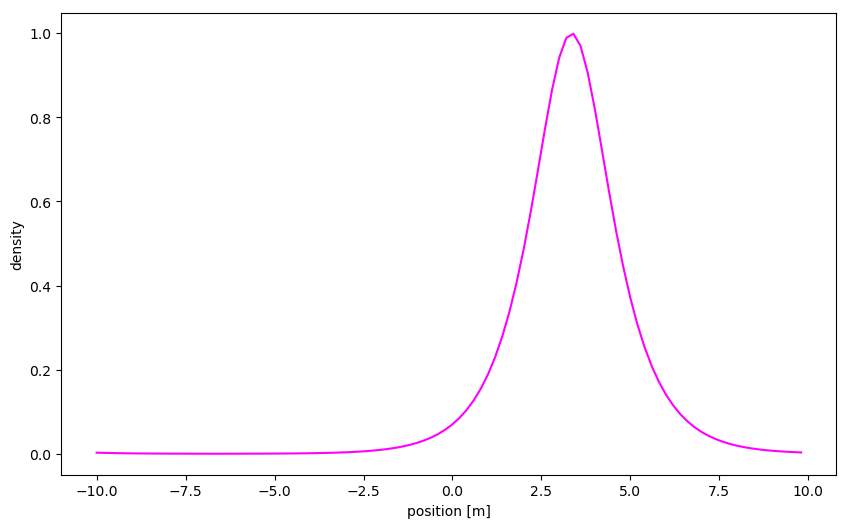

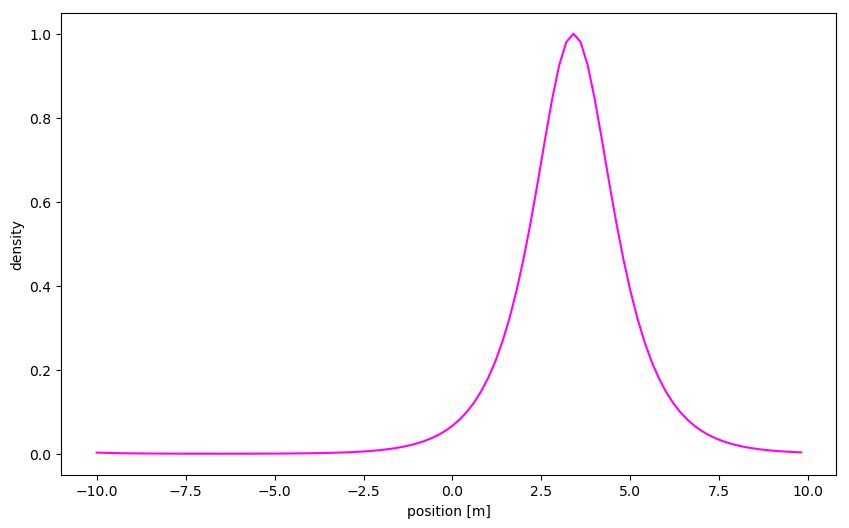

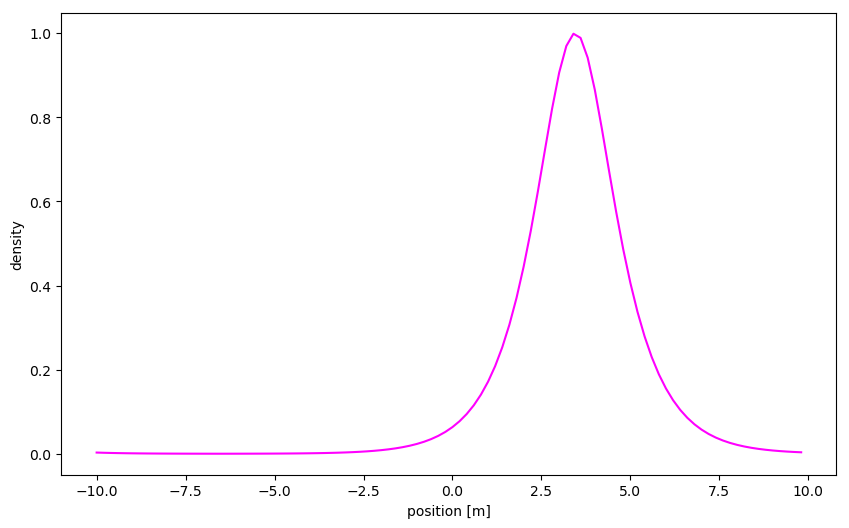

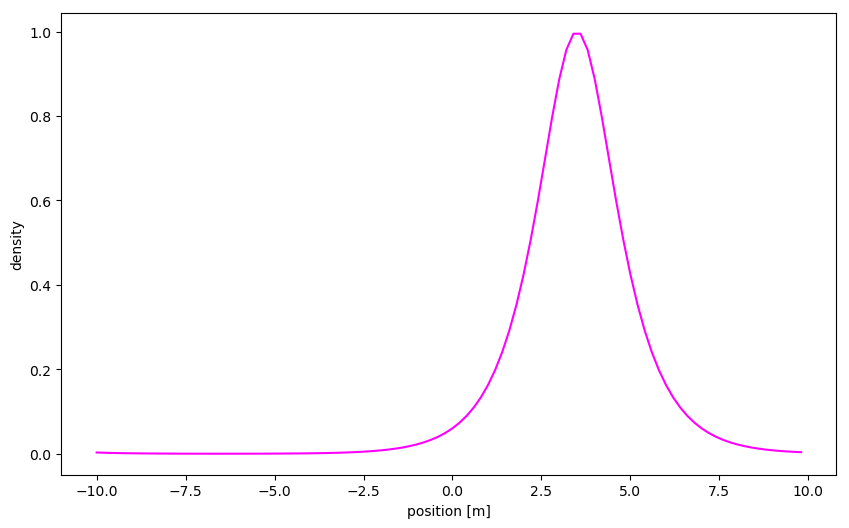

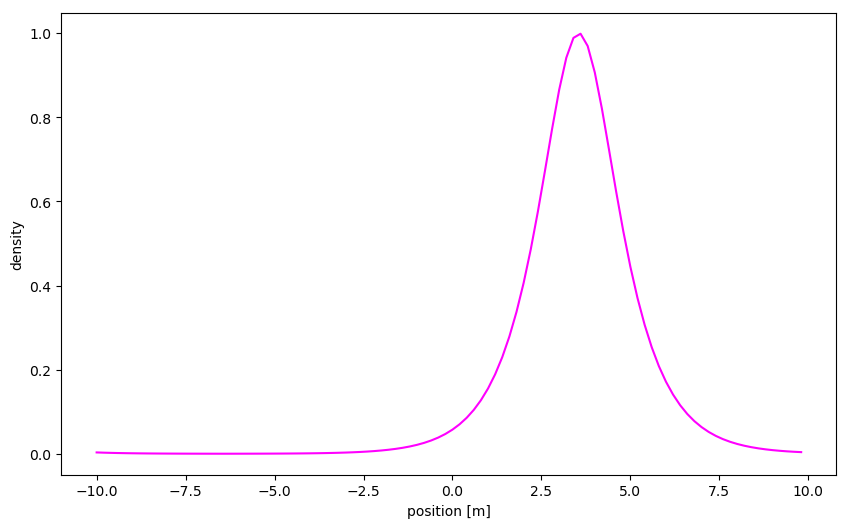

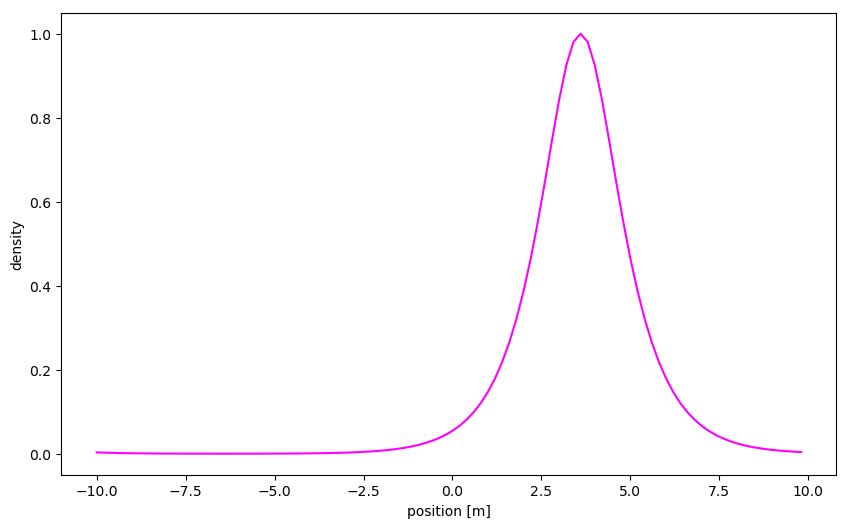

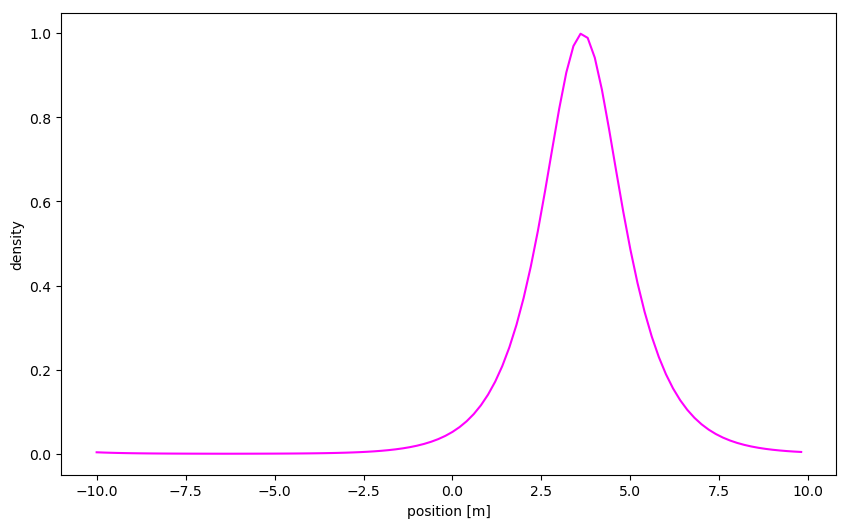

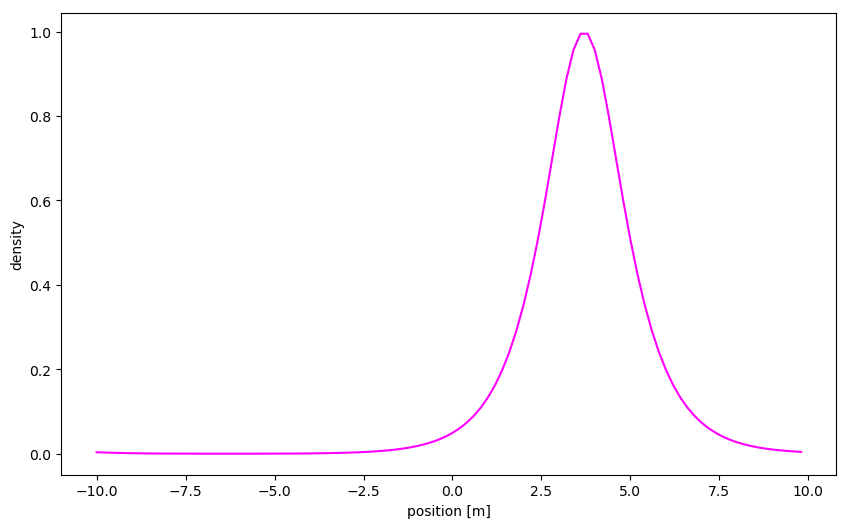

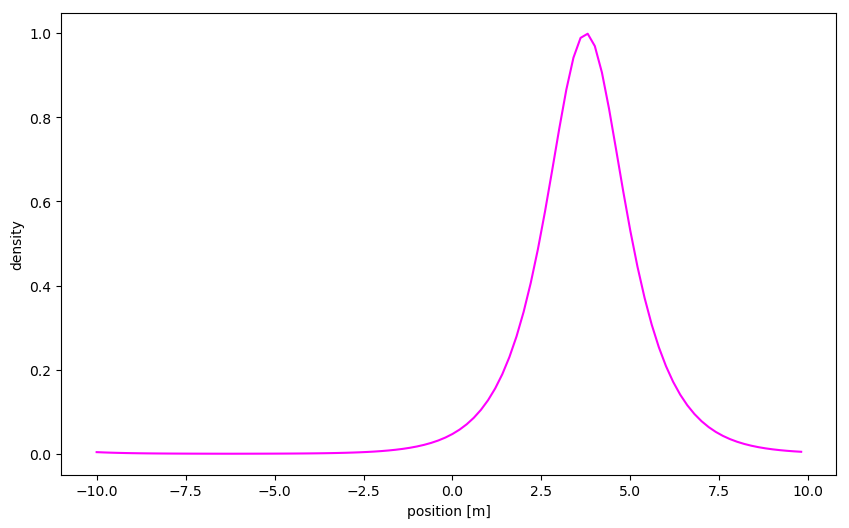

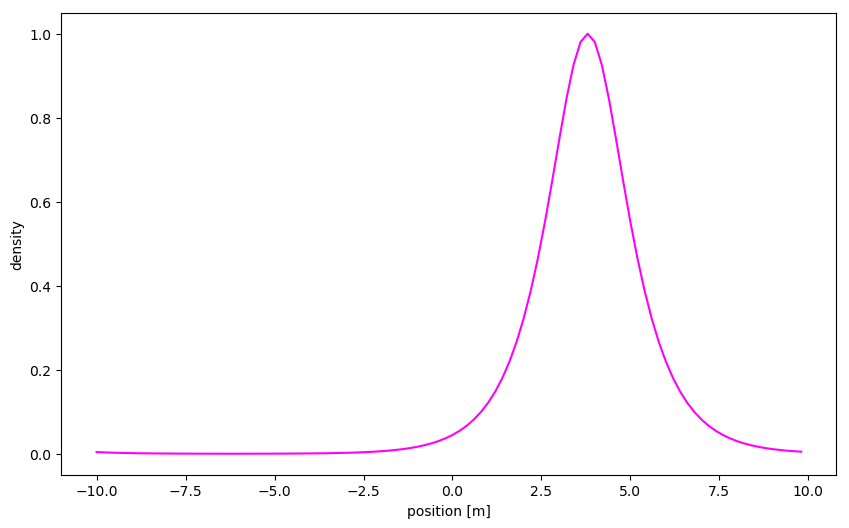

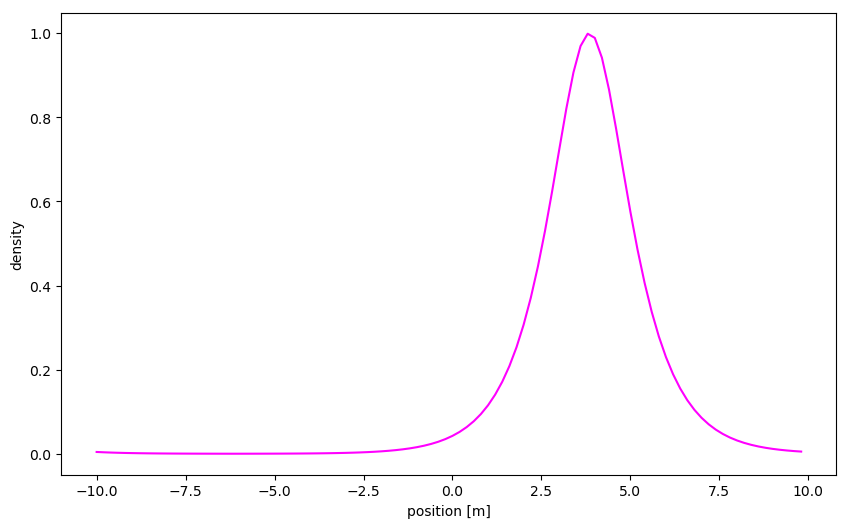

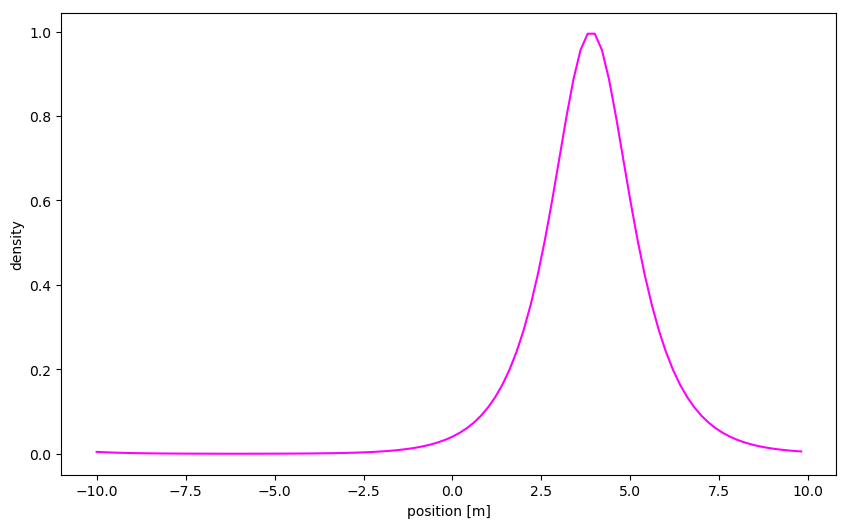

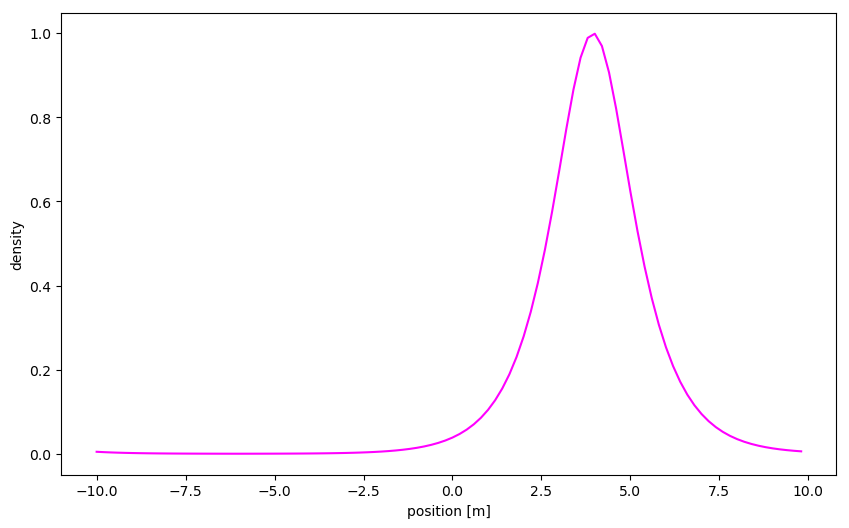

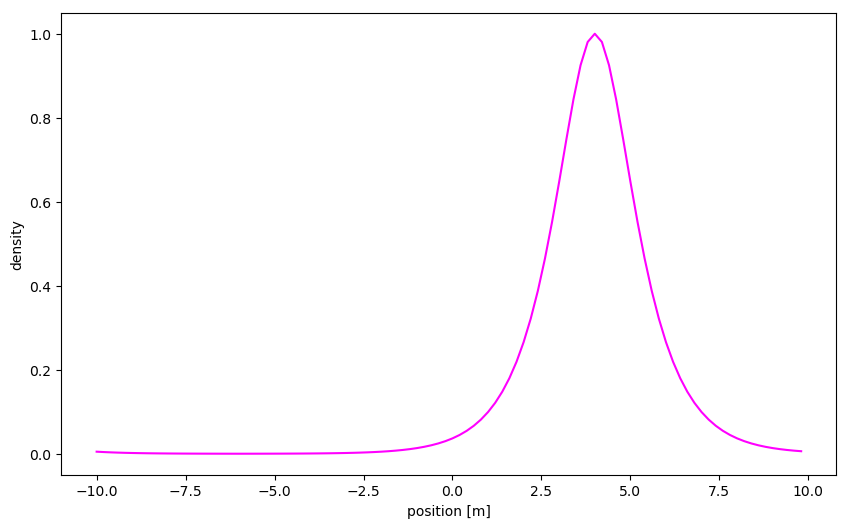

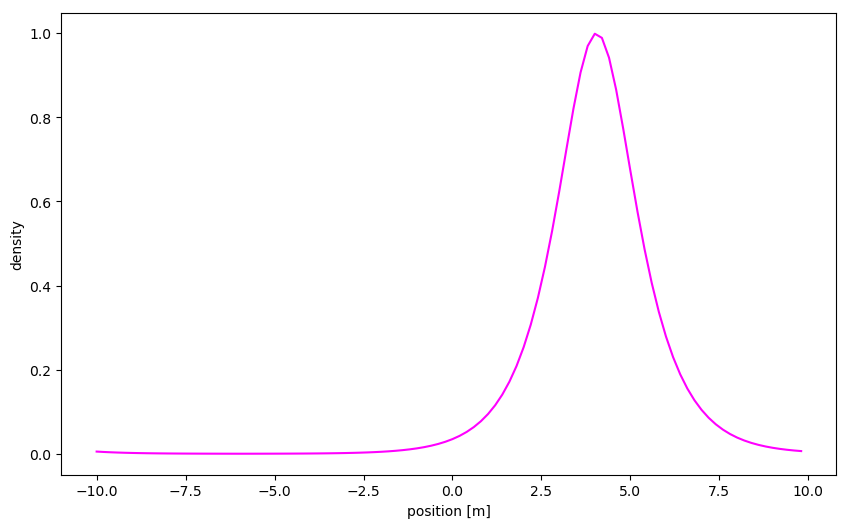

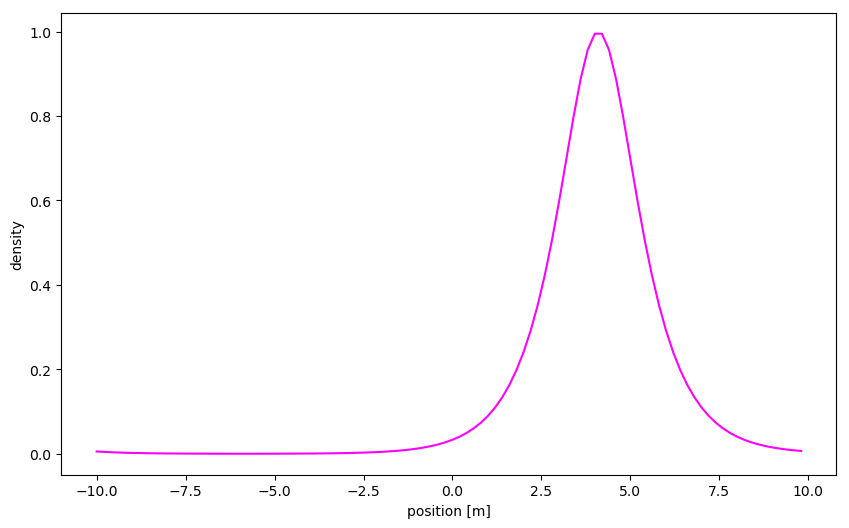

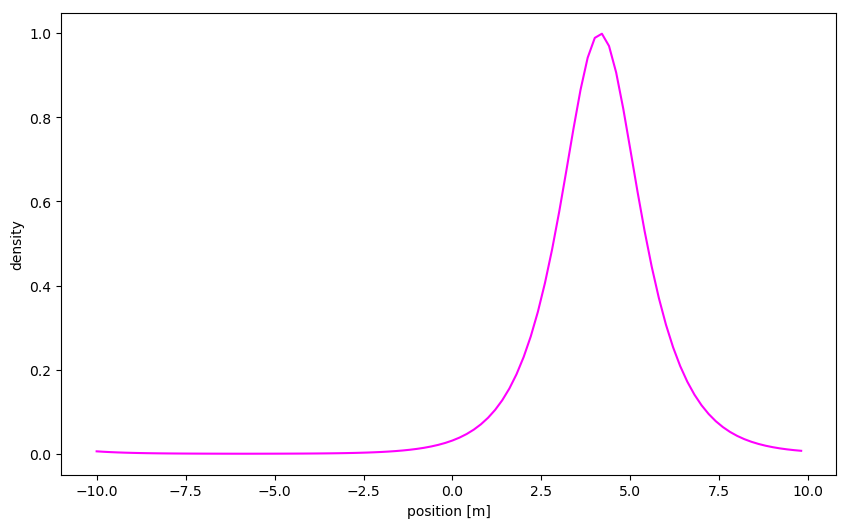

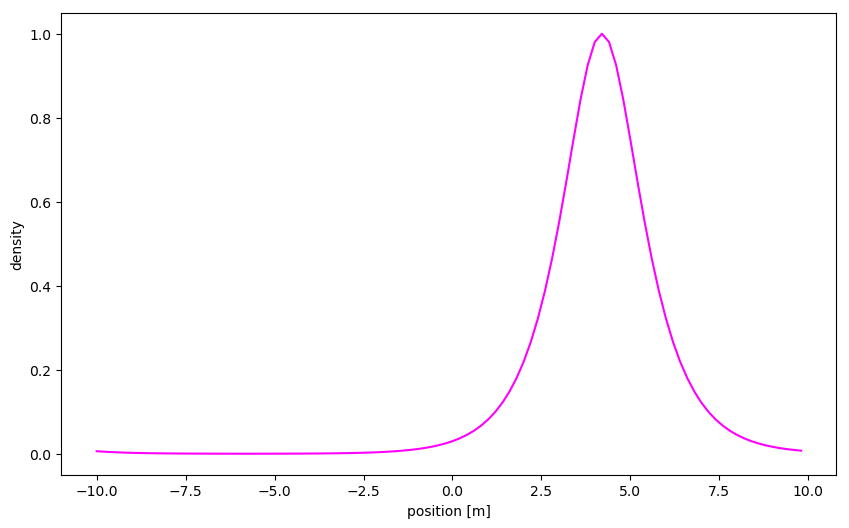

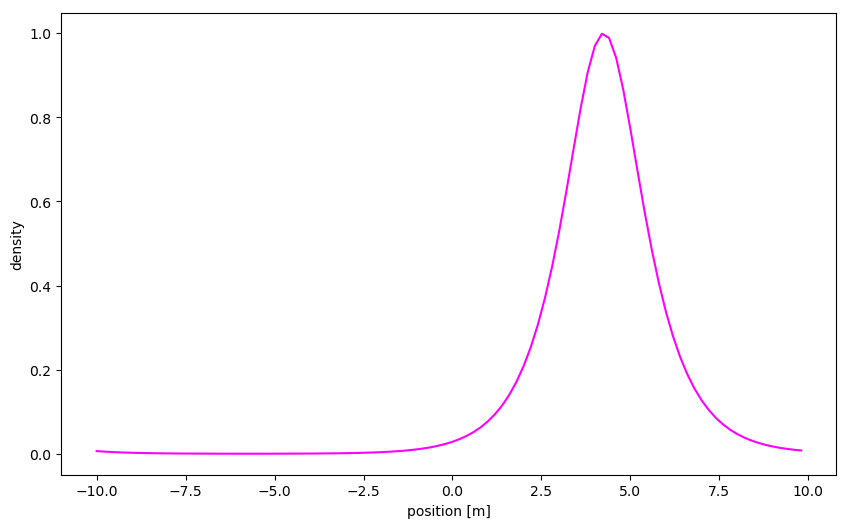

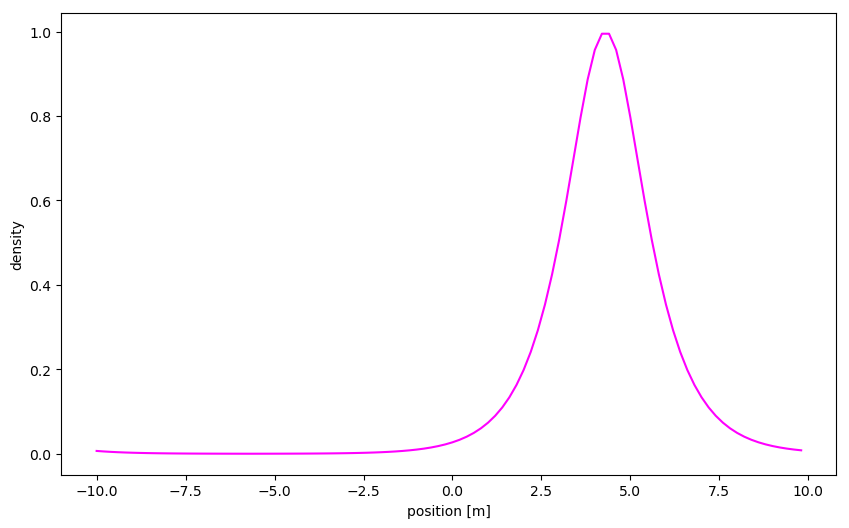

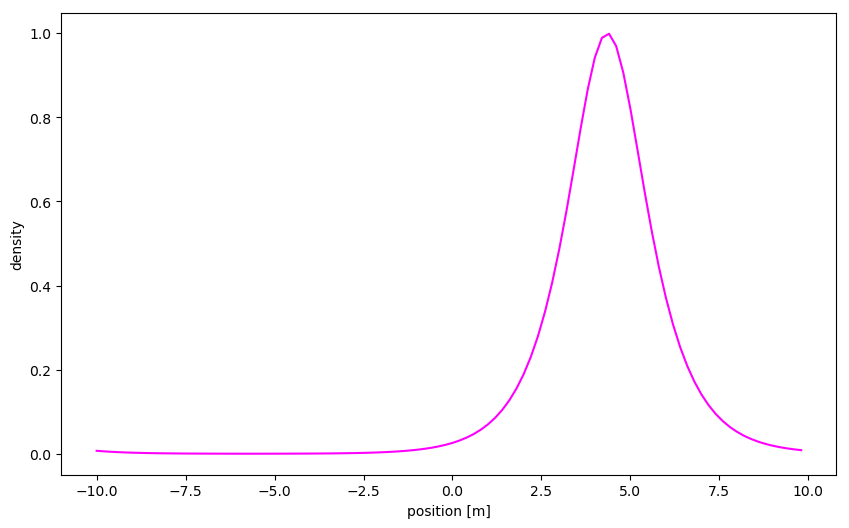

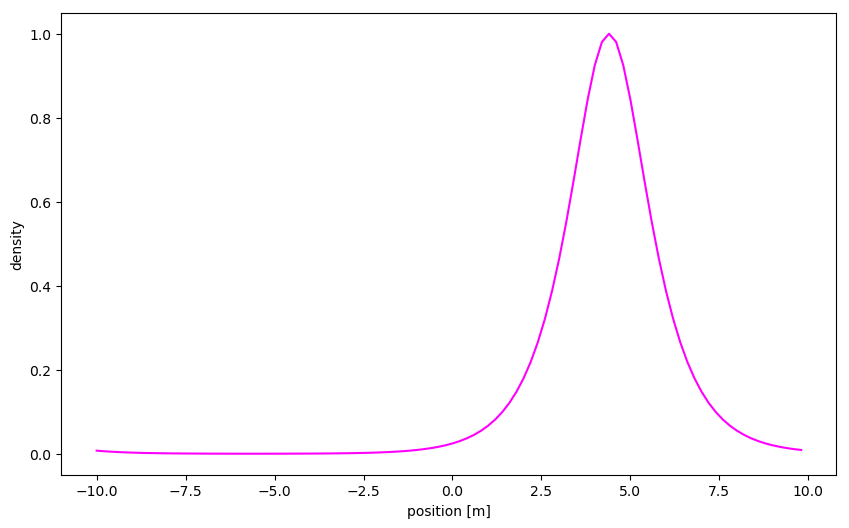

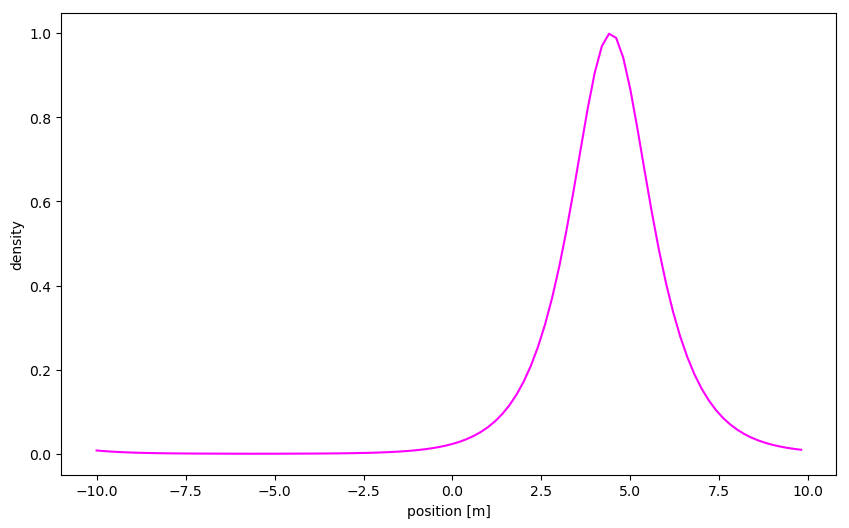

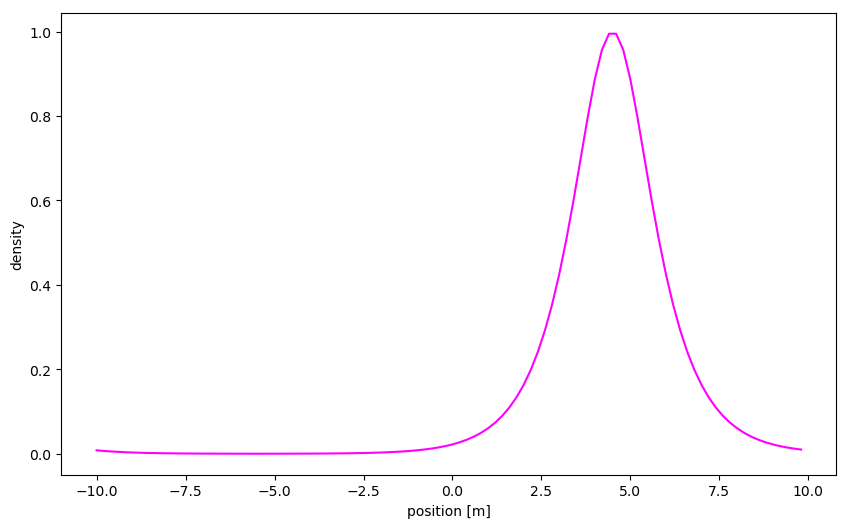

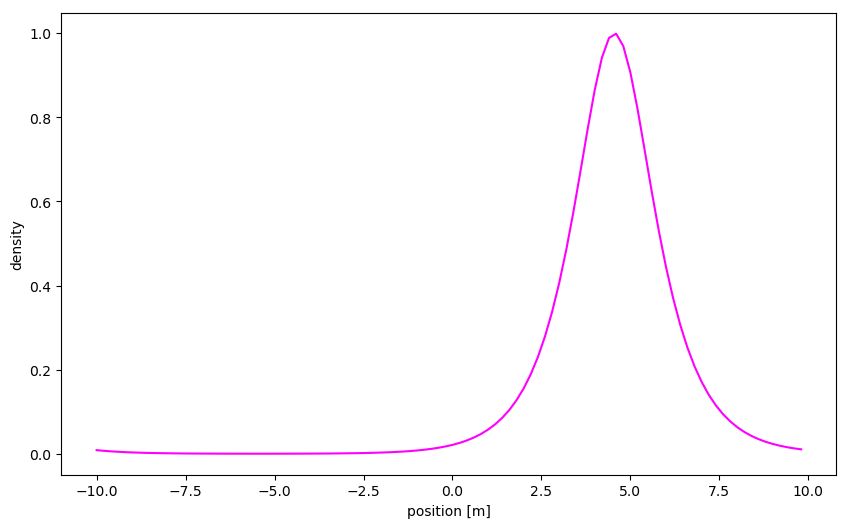

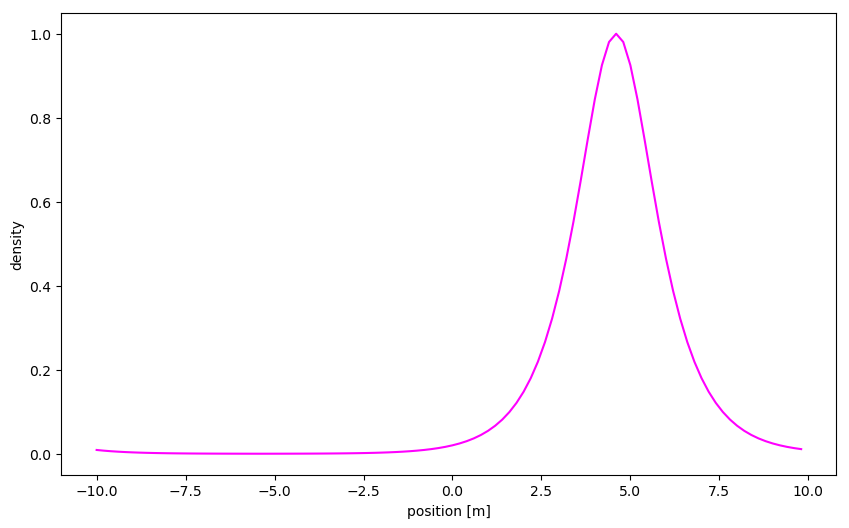

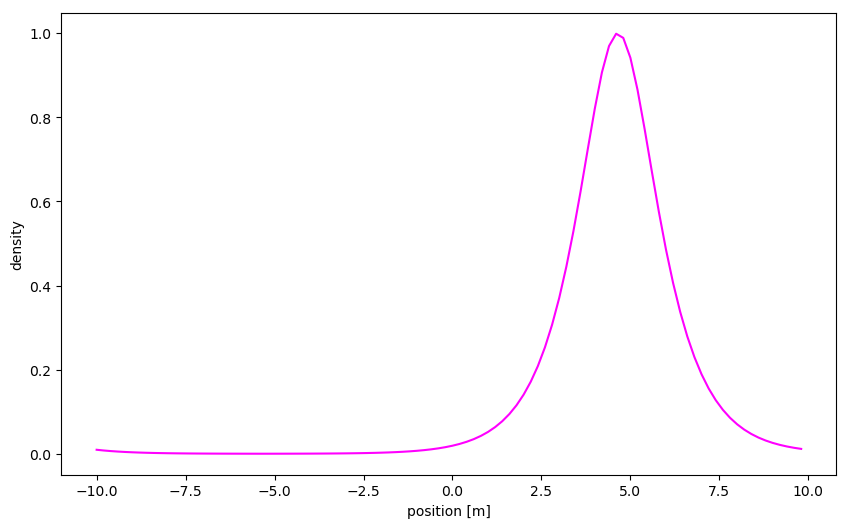

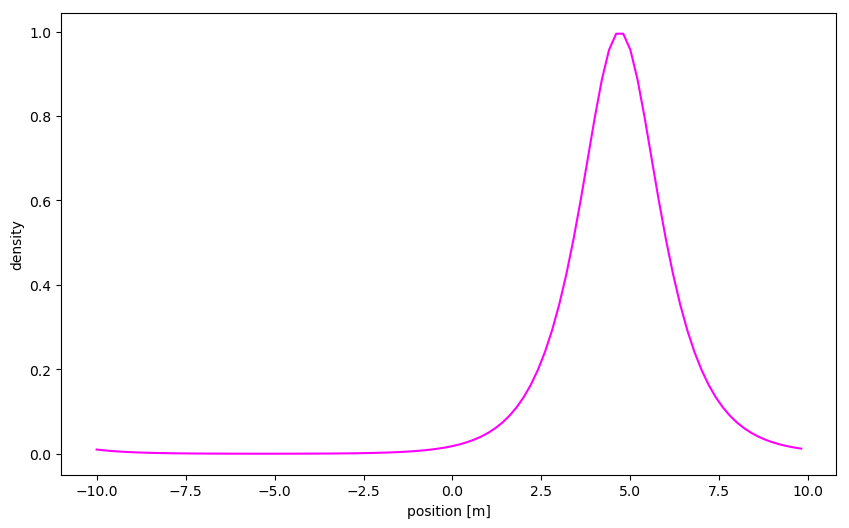

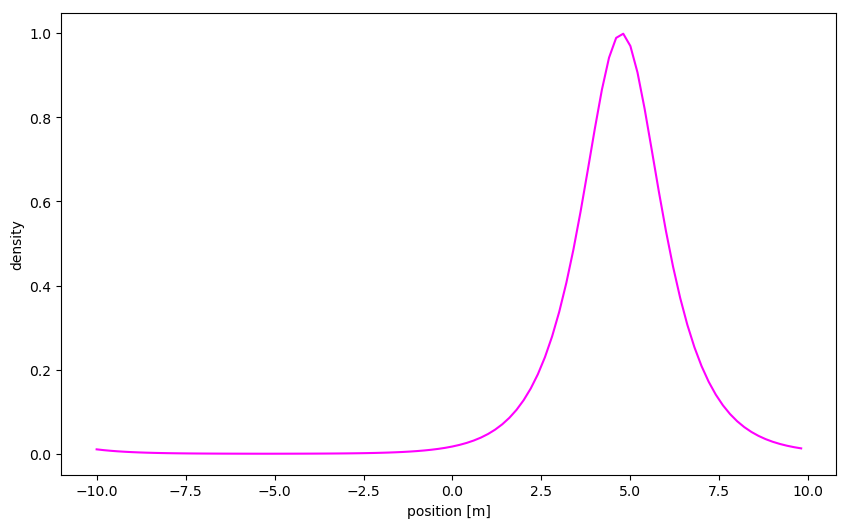

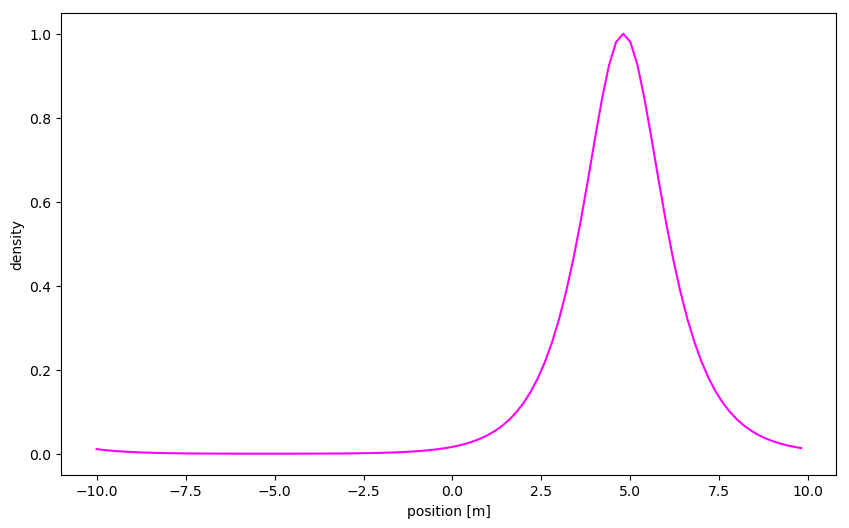

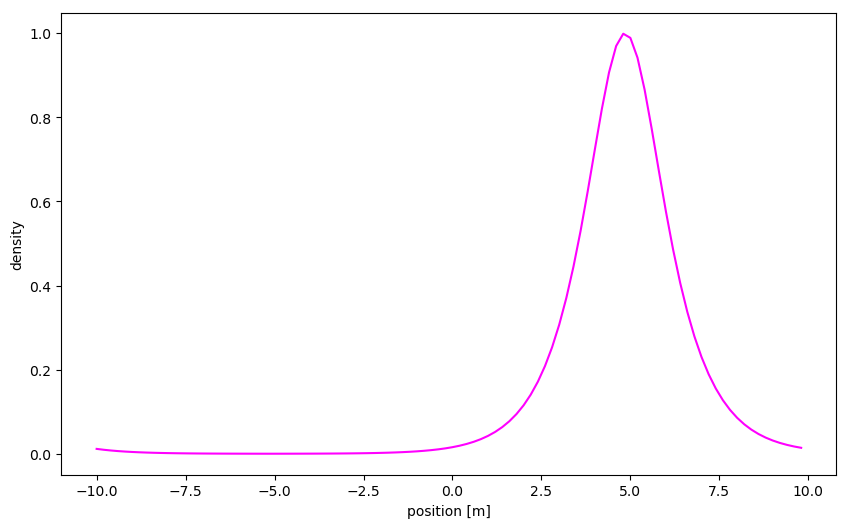

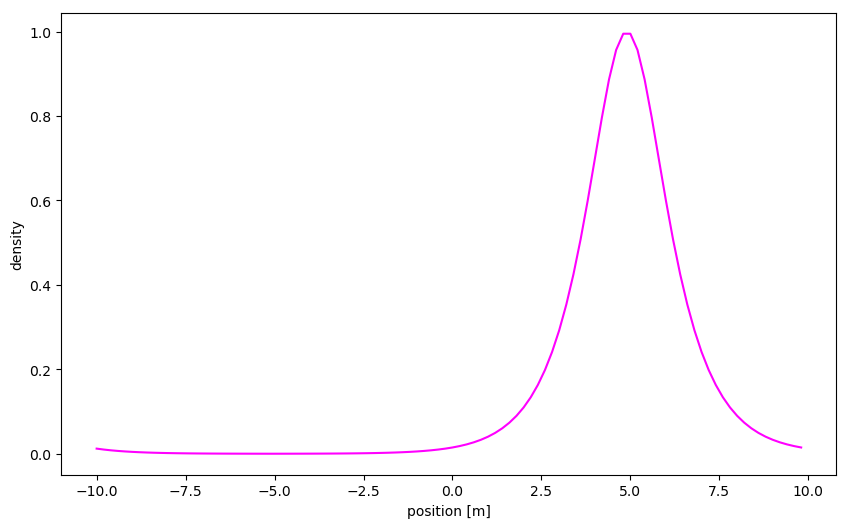

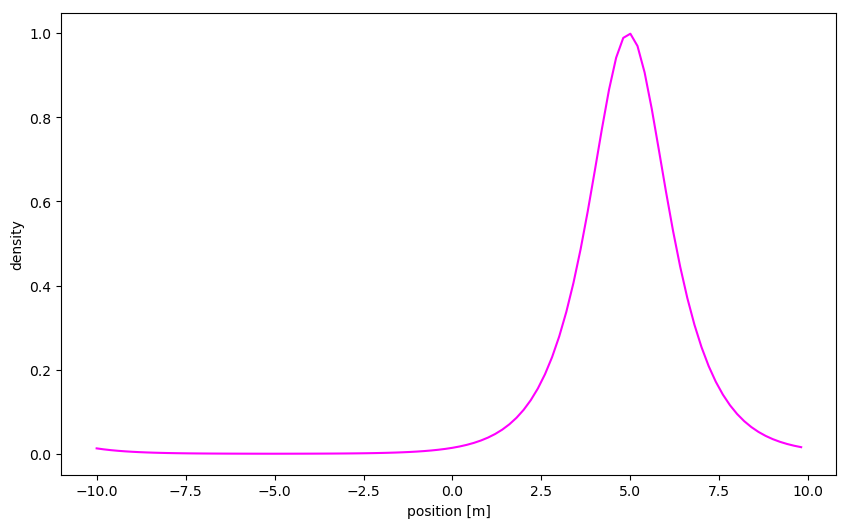

In [25]:
# Add colour

for j in range(m):
    
    
    plt.figure(figsize= (10, 6))
    
    plt.plot(x, inv_rho_solution[j, :], color = "magenta")

    plt.xlabel("position [m]")
    plt.ylabel("density")

    plt.savefig("./wave1D{:03d}.png".format(j))
    
    plt.close()

In [26]:
import glob
from PIL import Image

In [27]:
images_in = "./wave****.png"

gif_image_out = "./animation_wave.gif"

imgs = (Image.open(f) for f in sorted(glob.glob(images_in)))

img = next(imgs)

img.save(fp = gif_image_out, format='GIF', append_images=imgs, save_all=True, duration=100, loop=0)